# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [18]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

In [19]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,3)) - 1
# define syn0

syn1 = 2*np.random.random((3,1)) - 1
# define syn1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）


syn0_history = [syn0]
syn1_history = [syn1]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [20]:
syn0, syn1

(array([[-0.16595599,  0.44064899, -0.99977125],
        [-0.39533485, -0.70648822, -0.81532281],
        [-0.62747958, -0.30887855, -0.20646505]]),
 array([[ 0.07763347],
        [-0.16161097],
        [ 0.370439  ]]))

In [21]:
for iter in range(70000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2,True)
    
    syn1 += np.dot(l1.T,l2_delta)

    l1_error = np.dot(l2_delta, syn1.T)
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights            
        
        
    print("Iteration", iter, '\t L1_error = ', np.mean(l1_error), '\t L2_error = ', np.mean(l2_error) )
    syn1_history.append(syn1)
    syn0_history.append(syn0)

Iteration 0 	 L1_error =  -0.00027379811999619284 	 L2_error =  -0.014175598047475618
Iteration 1 	 L1_error =  -0.00019300347859134136 	 L2_error =  -0.011894792816739275
Iteration 2 	 L1_error =  -0.00012997207471867155 	 L2_error =  -0.009802250618647451
Iteration 3 	 L1_error =  -8.20260498464147e-05 	 L2_error =  -0.007879419909746888
Iteration 4 	 L1_error =  -4.688507945352187e-05 	 L2_error =  -0.006110834516587754
Iteration 5 	 L1_error =  -2.2598842182806687e-05 	 L2_error =  -0.004483664437303081
Iteration 6 	 L1_error =  -7.490380457222988e-06 	 L2_error =  -0.0029873383251614316
Iteration 7 	 L1_error =  -1.0881726072711234e-07 	 L2_error =  -0.001613227480627366
Iteration 8 	 L1_error =  8.100582666774672e-07 	 L2_error =  -0.0003543818789116804
Iteration 9 	 L1_error =  -3.6233198191010867e-06 	 L2_error =  0.0007946903745773559
Iteration 10 	 L1_error =  -1.2424765759090859e-05 	 L2_error =  0.0018382079249789907
Iteration 11 	 L1_error =  -2.4713194530327023e-05 	 L2_e

Iteration 540 	 L1_error =  -2.5461418434837475e-05 	 L2_error =  0.0010779002728257443
Iteration 541 	 L1_error =  -2.5411258311086636e-05 	 L2_error =  0.0010769026673200753
Iteration 542 	 L1_error =  -2.5361295673057872e-05 	 L2_error =  0.001075907895693404
Iteration 543 	 L1_error =  -2.5311529360015107e-05 	 L2_error =  0.0010749159445675137
Iteration 544 	 L1_error =  -2.5261958220282002e-05 	 L2_error =  0.0010739268006524534
Iteration 545 	 L1_error =  -2.5212581111131805e-05 	 L2_error =  0.001072940450744915
Iteration 546 	 L1_error =  -2.5163396898729153e-05 	 L2_error =  0.0010719568817286577
Iteration 547 	 L1_error =  -2.5114404458013577e-05 	 L2_error =  0.0010709760805725221
Iteration 548 	 L1_error =  -2.506560267264324e-05 	 L2_error =  0.0010699980343309122
Iteration 549 	 L1_error =  -2.5016990434887996e-05 	 L2_error =  0.0010690227301421128
Iteration 550 	 L1_error =  -2.4968566645562644e-05 	 L2_error =  0.001068050155228234
Iteration 551 	 L1_error =  -2.49203

Iteration 1089 	 L1_error =  -1.2236641456672912e-05 	 L2_error =  0.0007619640781163263
Iteration 1090 	 L1_error =  -1.222511274409506e-05 	 L2_error =  0.0007616219500980424
Iteration 1091 	 L1_error =  -1.2213605873536394e-05 	 L2_error =  0.0007612802973805434
Iteration 1092 	 L1_error =  -1.2202120782962988e-05 	 L2_error =  0.000760939118860663
Iteration 1093 	 L1_error =  -1.2190657410576564e-05 	 L2_error =  0.000760598413438859
Iteration 1094 	 L1_error =  -1.2179215694809996e-05 	 L2_error =  0.0007602581800190515
Iteration 1095 	 L1_error =  -1.2167795574330963e-05 	 L2_error =  0.0007599184175088348
Iteration 1096 	 L1_error =  -1.2156396988036033e-05 	 L2_error =  0.0007595791248192155
Iteration 1097 	 L1_error =  -1.2145019875054518e-05 	 L2_error =  0.000759240300864869
Iteration 1098 	 L1_error =  -1.2133664174741933e-05 	 L2_error =  0.0007589019445638119
Iteration 1099 	 L1_error =  -1.2122329826683514e-05 	 L2_error =  0.000758564054837662
Iteration 1100 	 L1_error 

Iteration 1672 	 L1_error =  -7.905106550242026e-06 	 L2_error =  0.0006184265074629536
Iteration 1673 	 L1_error =  -7.900325090470288e-06 	 L2_error =  0.0006182473868388688
Iteration 1674 	 L1_error =  -7.895549461046401e-06 	 L2_error =  0.0006180684272675046
Iteration 1675 	 L1_error =  -7.890779651297748e-06 	 L2_error =  0.000617889628506587
Iteration 1676 	 L1_error =  -7.886015650578642e-06 	 L2_error =  0.0006177109903144178
Iteration 1677 	 L1_error =  -7.881257448270331e-06 	 L2_error =  0.0006175325124498626
Iteration 1678 	 L1_error =  -7.87650503377821e-06 	 L2_error =  0.0006173541946721921
Iteration 1679 	 L1_error =  -7.871758396535194e-06 	 L2_error =  0.0006171760367412859
Iteration 1680 	 L1_error =  -7.867017525998337e-06 	 L2_error =  0.000616998038417433
Iteration 1681 	 L1_error =  -7.862282411653552e-06 	 L2_error =  0.00061682019946165
Iteration 1682 	 L1_error =  -7.857553043007172e-06 	 L2_error =  0.0006166425196350864
Iteration 1683 	 L1_error =  -7.85282

Iteration 2255 	 L1_error =  -5.8476863591846795e-06 	 L2_error =  0.0005352172210183097
Iteration 2256 	 L1_error =  -5.845084093388901e-06 	 L2_error =  0.0005351029177431106
Iteration 2257 	 L1_error =  -5.842484165670291e-06 	 L2_error =  0.0005349886904157594
Iteration 2258 	 L1_error =  -5.839886572873172e-06 	 L2_error =  0.0005348745389517906
Iteration 2259 	 L1_error =  -5.837291311848378e-06 	 L2_error =  0.0005347604632669478
Iteration 2260 	 L1_error =  -5.834698379451318e-06 	 L2_error =  0.0005346464632770102
Iteration 2261 	 L1_error =  -5.832107772543732e-06 	 L2_error =  0.0005345325388979487
Iteration 2262 	 L1_error =  -5.8295194879928165e-06 	 L2_error =  0.0005344186900458504
Iteration 2263 	 L1_error =  -5.8269335226714e-06 	 L2_error =  0.0005343049166369289
Iteration 2264 	 L1_error =  -5.824349873458524e-06 	 L2_error =  0.000534191218587581
Iteration 2265 	 L1_error =  -5.8217685372373424e-06 	 L2_error =  0.0005340775958142044
Iteration 2266 	 L1_error =  -5.

Iteration 2802 	 L1_error =  -4.70462911754652e-06 	 L2_error =  0.0004821429263474038
Iteration 2803 	 L1_error =  -4.702952245166627e-06 	 L2_error =  0.00048206035898826303
Iteration 2804 	 L1_error =  -4.7012765807792605e-06 	 L2_error =  0.0004819778356931065
Iteration 2805 	 L1_error =  -4.699602123077607e-06 	 L2_error =  0.0004818953564226548
Iteration 2806 	 L1_error =  -4.697928870754929e-06 	 L2_error =  0.00048181292113750815
Iteration 2807 	 L1_error =  -4.6962568225073496e-06 	 L2_error =  0.00048173052979841487
Iteration 2808 	 L1_error =  -4.694585977034059e-06 	 L2_error =  0.0004816481823662847
Iteration 2809 	 L1_error =  -4.692916333032806e-06 	 L2_error =  0.0004815658788017499
Iteration 2810 	 L1_error =  -4.69124788920774e-06 	 L2_error =  0.00048148361906593
Iteration 2811 	 L1_error =  -4.689580644260153e-06 	 L2_error =  0.0004814014031195423
Iteration 2812 	 L1_error =  -4.687914596897195e-06 	 L2_error =  0.00048131923092374195
Iteration 2813 	 L1_error =  -

Iteration 3334 	 L1_error =  -3.955759071328926e-06 	 L2_error =  0.00044359787454318483
Iteration 3335 	 L1_error =  -3.95457811811405e-06 	 L2_error =  0.0004435342030468794
Iteration 3336 	 L1_error =  -3.953397878039921e-06 	 L2_error =  0.0004434705600695815
Iteration 3337 	 L1_error =  -3.9522183504581854e-06 	 L2_error =  0.00044340694558980993
Iteration 3338 	 L1_error =  -3.951039534723218e-06 	 L2_error =  0.00044334335958628925
Iteration 3339 	 L1_error =  -3.949861430189567e-06 	 L2_error =  0.00044327980203772224
Iteration 3340 	 L1_error =  -3.948684036211138e-06 	 L2_error =  0.0004432162729226729
Iteration 3341 	 L1_error =  -3.947507352144612e-06 	 L2_error =  0.0004431527722199378
Iteration 3342 	 L1_error =  -3.946331377345329e-06 	 L2_error =  0.0004430892999081233
Iteration 3343 	 L1_error =  -3.945156111172048e-06 	 L2_error =  0.0004430258559661223
Iteration 3344 	 L1_error =  -3.943981552982633e-06 	 L2_error =  0.00044296244037268263
Iteration 3345 	 L1_error =

Iteration 3897 	 L1_error =  -3.38732922328018e-06 	 L2_error =  0.0004117108973747856
Iteration 3898 	 L1_error =  -3.3864664666856785e-06 	 L2_error =  0.0004116604579174916
Iteration 3899 	 L1_error =  -3.385604154894226e-06 	 L2_error =  0.0004116100377678424
Iteration 3900 	 L1_error =  -3.3847422875596e-06 	 L2_error =  0.0004115596369133152
Iteration 3901 	 L1_error =  -3.3838808643388407e-06 	 L2_error =  0.0004115092553417087
Iteration 3902 	 L1_error =  -3.383019884887045e-06 	 L2_error =  0.00041145889304058415
Iteration 3903 	 L1_error =  -3.382159348860503e-06 	 L2_error =  0.00041140854999760154
Iteration 3904 	 L1_error =  -3.381299255915775e-06 	 L2_error =  0.0004113582262004192
Iteration 3905 	 L1_error =  -3.380439605710524e-06 	 L2_error =  0.0004113079216368073
Iteration 3906 	 L1_error =  -3.3795803979017912e-06 	 L2_error =  0.00041125763629442334
Iteration 3907 	 L1_error =  -3.3787216321464796e-06 	 L2_error =  0.0004112073701608744
Iteration 3908 	 L1_error = 

Iteration 4468 	 L1_error =  -2.9578007301254356e-06 	 L2_error =  0.00038571315462415916
Iteration 4469 	 L1_error =  -2.9571451339116808e-06 	 L2_error =  0.00038567202077648913
Iteration 4470 	 L1_error =  -2.956489832017512e-06 	 L2_error =  0.0003856309006504584
Iteration 4471 	 L1_error =  -2.9558348242440144e-06 	 L2_error =  0.00038558979423837167
Iteration 4472 	 L1_error =  -2.955180110393398e-06 	 L2_error =  0.0003855487015326656
Iteration 4473 	 L1_error =  -2.9545256902678137e-06 	 L2_error =  0.0003855076225257456
Iteration 4474 	 L1_error =  -2.95387156366696e-06 	 L2_error =  0.0003854665572097073
Iteration 4475 	 L1_error =  -2.9532177303949267e-06 	 L2_error =  0.00038542550557716434
Iteration 4476 	 L1_error =  -2.9525641902530187e-06 	 L2_error =  0.0003853844676203833
Iteration 4477 	 L1_error =  -2.9519109430434245e-06 	 L2_error =  0.0003853434433316993
Iteration 4478 	 L1_error =  -2.9512579885695145e-06 	 L2_error =  0.00038530243270360094
Iteration 4479 	 L1_

Iteration 4899 	 L1_error =  -2.700110297602434e-06 	 L2_error =  0.0003691622561774613
Iteration 4900 	 L1_error =  -2.699565255544502e-06 	 L2_error =  0.00036912639790472263
Iteration 4901 	 L1_error =  -2.699020436419624e-06 	 L2_error =  0.0003690905505357748
Iteration 4902 	 L1_error =  -2.698475840089732e-06 	 L2_error =  0.0003690547140649432
Iteration 4903 	 L1_error =  -2.6979314664174755e-06 	 L2_error =  0.00036901888848664497
Iteration 4904 	 L1_error =  -2.6973873152667913e-06 	 L2_error =  0.00036898307379543485
Iteration 4905 	 L1_error =  -2.6968433865009075e-06 	 L2_error =  0.0003689472699857912
Iteration 4906 	 L1_error =  -2.6962996799820133e-06 	 L2_error =  0.00036891147705202503
Iteration 4907 	 L1_error =  -2.69575619557508e-06 	 L2_error =  0.0003688756949888107
Iteration 4908 	 L1_error =  -2.6952129331420934e-06 	 L2_error =  0.0003688399237904193
Iteration 4909 	 L1_error =  -2.6946698925480835e-06 	 L2_error =  0.0003688041634515105
Iteration 4910 	 L1_err

Iteration 5489 	 L1_error =  -2.413102553485259e-06 	 L2_error =  0.00034972924595104687
Iteration 5490 	 L1_error =  -2.4126685408989044e-06 	 L2_error =  0.0003496989750425509
Iteration 5491 	 L1_error =  -2.4122346865625635e-06 	 L2_error =  0.0003496687123443788
Iteration 5492 	 L1_error =  -2.4118009903889892e-06 	 L2_error =  0.0003496384578527325
Iteration 5493 	 L1_error =  -2.411367452292214e-06 	 L2_error =  0.00034960821156400064
Iteration 5494 	 L1_error =  -2.410934072185099e-06 	 L2_error =  0.0003495779734743842
Iteration 5495 	 L1_error =  -2.410500849981261e-06 	 L2_error =  0.0003495477435801974
Iteration 5496 	 L1_error =  -2.41006778559353e-06 	 L2_error =  0.0003495175218776424
Iteration 5497 	 L1_error =  -2.409634878936276e-06 	 L2_error =  0.0003494873083631088
Iteration 5498 	 L1_error =  -2.409202129922831e-06 	 L2_error =  0.0003494571030328523
Iteration 5499 	 L1_error =  -2.4087695384662878e-06 	 L2_error =  0.00034942690588308286
Iteration 5500 	 L1_error 

Iteration 6037 	 L1_error =  -2.1968287634293793e-06 	 L2_error =  0.0003342777049284108
Iteration 6038 	 L1_error =  -2.196470001980531e-06 	 L2_error =  0.00033425143256326974
Iteration 6039 	 L1_error =  -2.1961113593585197e-06 	 L2_error =  0.00033422516667402187
Iteration 6040 	 L1_error =  -2.195752835503208e-06 	 L2_error =  0.00033419890725786255
Iteration 6041 	 L1_error =  -2.1953944303566594e-06 	 L2_error =  0.000334172654312302
Iteration 6042 	 L1_error =  -2.1950361438589355e-06 	 L2_error =  0.00033414640783455216
Iteration 6043 	 L1_error =  -2.1946779759511995e-06 	 L2_error =  0.00033412016782197705
Iteration 6044 	 L1_error =  -2.1943199265747656e-06 	 L2_error =  0.00033409393427197287
Iteration 6045 	 L1_error =  -2.1939619956697667e-06 	 L2_error =  0.00033406770718174324
Iteration 6046 	 L1_error =  -2.1936041831781307e-06 	 L2_error =  0.0003340414865487572
Iteration 6047 	 L1_error =  -2.193246489039951e-06 	 L2_error =  0.00033401527237021406
Iteration 6048 	 

Iteration 6623 	 L1_error =  -2.0051607779516625e-06 	 L2_error =  0.0003199098098011005
Iteration 6624 	 L1_error =  -2.0048626703400956e-06 	 L2_error =  0.00031988692058977294
Iteration 6625 	 L1_error =  -2.0045646526516563e-06 	 L2_error =  0.0003198640365188613
Iteration 6626 	 L1_error =  -2.0042667248462376e-06 	 L2_error =  0.00031984115758652235
Iteration 6627 	 L1_error =  -2.003968886882929e-06 	 L2_error =  0.00031981828379082236
Iteration 6628 	 L1_error =  -2.003671138720098e-06 	 L2_error =  0.00031979541512969223
Iteration 6629 	 L1_error =  -2.0033734803179034e-06 	 L2_error =  0.00031977255160133694
Iteration 6630 	 L1_error =  -2.0030759116362805e-06 	 L2_error =  0.00031974969320392246
Iteration 6631 	 L1_error =  -2.0027784326330896e-06 	 L2_error =  0.00031972683993531335
Iteration 6632 	 L1_error =  -2.0024810432681743e-06 	 L2_error =  0.00031970399179364695
Iteration 6633 	 L1_error =  -2.002183743501397e-06 	 L2_error =  0.0003196811487770758
Iteration 6634 	

Iteration 7122 	 L1_error =  -1.8667966682603538e-06 	 L2_error =  0.00030908943528228355
Iteration 7123 	 L1_error =  -1.8665388259421515e-06 	 L2_error =  0.0003090688902484236
Iteration 7124 	 L1_error =  -1.866281055905124e-06 	 L2_error =  0.0003090483495038132
Iteration 7125 	 L1_error =  -1.8660233581198217e-06 	 L2_error =  0.0003090278130471178
Iteration 7126 	 L1_error =  -1.8657657325548163e-06 	 L2_error =  0.00030900728087668826
Iteration 7127 	 L1_error =  -1.86550817917961e-06 	 L2_error =  0.00030898675299101787
Iteration 7128 	 L1_error =  -1.8652506979642337e-06 	 L2_error =  0.0003089662293886859
Iteration 7129 	 L1_error =  -1.8649932888788042e-06 	 L2_error =  0.0003089457100682756
Iteration 7130 	 L1_error =  -1.864735951891807e-06 	 L2_error =  0.0003089251950281241
Iteration 7131 	 L1_error =  -1.8644786869730612e-06 	 L2_error =  0.0003089046842667648
Iteration 7132 	 L1_error =  -1.8642214940924934e-06 	 L2_error =  0.00030888417778275005
Iteration 7133 	 L1_e

Iteration 7706 	 L1_error =  -1.7275907029346379e-06 	 L2_error =  0.00029777507366566527
Iteration 7707 	 L1_error =  -1.7273703959882687e-06 	 L2_error =  0.0002977568004532529
Iteration 7708 	 L1_error =  -1.7271501460822547e-06 	 L2_error =  0.00029773853076548243
Iteration 7709 	 L1_error =  -1.726929953195133e-06 	 L2_error =  0.00029772026460134476
Iteration 7710 	 L1_error =  -1.7267098173035032e-06 	 L2_error =  0.0002977020019595037
Iteration 7711 	 L1_error =  -1.7264897383858573e-06 	 L2_error =  0.00029768374283893704
Iteration 7712 	 L1_error =  -1.7262697164199195e-06 	 L2_error =  0.0002976654872384951
Iteration 7713 	 L1_error =  -1.7260497513834815e-06 	 L2_error =  0.00029764723515703344
Iteration 7714 	 L1_error =  -1.7258298432543265e-06 	 L2_error =  0.00029762898659341404
Iteration 7715 	 L1_error =  -1.7256099920098172e-06 	 L2_error =  0.00029761074154641826
Iteration 7716 	 L1_error =  -1.7253901976285496e-06 	 L2_error =  0.0002975925000150356
Iteration 7717 

Iteration 8284 	 L1_error =  -1.6091027742387721e-06 	 L2_error =  0.00028776666231923164
Iteration 8285 	 L1_error =  -1.6089120683644303e-06 	 L2_error =  0.00028775025166427083
Iteration 8286 	 L1_error =  -1.6087214083943526e-06 	 L2_error =  0.0002877338439529766
Iteration 8287 	 L1_error =  -1.6085307943116321e-06 	 L2_error =  0.00028771743918442434
Iteration 8288 	 L1_error =  -1.6083402260994566e-06 	 L2_error =  0.0002877010373577007
Iteration 8289 	 L1_error =  -1.6081497037418368e-06 	 L2_error =  0.00028768463847201903
Iteration 8290 	 L1_error =  -1.6079592272214728e-06 	 L2_error =  0.00028766824252638963
Iteration 8291 	 L1_error =  -1.6077687965218483e-06 	 L2_error =  0.0002876518495199352
Iteration 8292 	 L1_error =  -1.6075784116266598e-06 	 L2_error =  0.00028763545945182777
Iteration 8293 	 L1_error =  -1.6073880725191768e-06 	 L2_error =  0.0002876190723211528
Iteration 8294 	 L1_error =  -1.6071977791826753e-06 	 L2_error =  0.0002876026881270125
Iteration 8295 

Iteration 8823 	 L1_error =  -1.512562568759489e-06 	 L2_error =  0.0002793263825615366
Iteration 8824 	 L1_error =  -1.5123943866065744e-06 	 L2_error =  0.0002793114392646537
Iteration 8825 	 L1_error =  -1.5122262424437106e-06 	 L2_error =  0.00027929649848373265
Iteration 8826 	 L1_error =  -1.512058136259121e-06 	 L2_error =  0.0002792815602182582
Iteration 8827 	 L1_error =  -1.5118900680381619e-06 	 L2_error =  0.0002792666244672221
Iteration 8828 	 L1_error =  -1.5117220377692117e-06 	 L2_error =  0.0002792516912301394
Iteration 8829 	 L1_error =  -1.5115540454388854e-06 	 L2_error =  0.0002792367605062183
Iteration 8830 	 L1_error =  -1.5113860910342268e-06 	 L2_error =  0.0002792218322947371
Iteration 8831 	 L1_error =  -1.5112181745423494e-06 	 L2_error =  0.0002792069065949889
Iteration 8832 	 L1_error =  -1.511050295950995e-06 	 L2_error =  0.0002791919834063796
Iteration 8833 	 L1_error =  -1.5108824552463585e-06 	 L2_error =  0.000279177062728027
Iteration 8834 	 L1_erro

Iteration 9369 	 L1_error =  -1.4260591801664872e-06 	 L2_error =  0.00027152350965441597
Iteration 9370 	 L1_error =  -1.4259099654181599e-06 	 L2_error =  0.0002715098415675089
Iteration 9371 	 L1_error =  -1.4257607823964953e-06 	 L2_error =  0.00027149617564721333
Iteration 9372 	 L1_error =  -1.425611631091925e-06 	 L2_error =  0.0002714825118930661
Iteration 9373 	 L1_error =  -1.425462511493273e-06 	 L2_error =  0.00027146885030430523
Iteration 9374 	 L1_error =  -1.4253134235914001e-06 	 L2_error =  0.0002714551908805404
Iteration 9375 	 L1_error =  -1.4251643673762168e-06 	 L2_error =  0.0002714415336212009
Iteration 9376 	 L1_error =  -1.425015342836551e-06 	 L2_error =  0.00027142787852552997
Iteration 9377 	 L1_error =  -1.424866349963036e-06 	 L2_error =  0.00027141422559309476
Iteration 9378 	 L1_error =  -1.424717388745274e-06 	 L2_error =  0.000271400574823263
Iteration 9379 	 L1_error =  -1.4245684591737499e-06 	 L2_error =  0.0002713869262155771
Iteration 9380 	 L1_er

Iteration 10016 	 L1_error =  -1.335720580003252e-06 	 L2_error =  0.000263108646785944
Iteration 10017 	 L1_error =  -1.3355899495124977e-06 	 L2_error =  0.0002630962691824272
Iteration 10018 	 L1_error =  -1.3354593449898108e-06 	 L2_error =  0.00026308389341373004
Iteration 10019 	 L1_error =  -1.3353287664274415e-06 	 L2_error =  0.00026307151947939974
Iteration 10020 	 L1_error =  -1.3351982138181232e-06 	 L2_error =  0.0002630591473790798
Iteration 10021 	 L1_error =  -1.3350676871532839e-06 	 L2_error =  0.00026304677711216397
Iteration 10022 	 L1_error =  -1.3349371864254044e-06 	 L2_error =  0.0002630344086782402
Iteration 10023 	 L1_error =  -1.3348067116277266e-06 	 L2_error =  0.0002630220420770397
Iteration 10024 	 L1_error =  -1.3346762627508765e-06 	 L2_error =  0.0002630096773078069
Iteration 10025 	 L1_error =  -1.3345458397882449e-06 	 L2_error =  0.0002629973143702972
Iteration 10026 	 L1_error =  -1.3344154427317477e-06 	 L2_error =  0.0002629849532640007
Iteration

Iteration 10605 	 L1_error =  -1.2630272260872703e-06 	 L2_error =  0.00025612127510605534
Iteration 10606 	 L1_error =  -1.2629106428936302e-06 	 L2_error =  0.00025610990433861747
Iteration 10607 	 L1_error =  -1.262794081579312e-06 	 L2_error =  0.0002560985351627715
Iteration 10608 	 L1_error =  -1.2626775421379118e-06 	 L2_error =  0.00025608716757810103
Iteration 10609 	 L1_error =  -1.2625610245642957e-06 	 L2_error =  0.0002560758015844296
Iteration 10610 	 L1_error =  -1.262444528851333e-06 	 L2_error =  0.00025606443718120776
Iteration 10611 	 L1_error =  -1.2623280549928165e-06 	 L2_error =  0.000256053074368056
Iteration 10612 	 L1_error =  -1.2622116029835373e-06 	 L2_error =  0.00025604171314478046
Iteration 10613 	 L1_error =  -1.2620951728160892e-06 	 L2_error =  0.0002560303535107775
Iteration 10614 	 L1_error =  -1.261978764485252e-06 	 L2_error =  0.00025601899546585363
Iteration 10615 	 L1_error =  -1.2618623779840735e-06 	 L2_error =  0.00025600763900948675
Iterati

Iteration 11116 	 L1_error =  -1.2061737637056873e-06 	 L2_error =  0.00025051028397767364
Iteration 11117 	 L1_error =  -1.206067603846448e-06 	 L2_error =  0.00025049968044706973
Iteration 11118 	 L1_error =  -1.2059614629882106e-06 	 L2_error =  0.0002504890783321936
Iteration 11119 	 L1_error =  -1.2058553411262524e-06 	 L2_error =  0.0002504784776327963
Iteration 11120 	 L1_error =  -1.205749238255008e-06 	 L2_error =  0.00025046787834847933
Iteration 11121 	 L1_error =  -1.2056431543691215e-06 	 L2_error =  0.0002504572804788766
Iteration 11122 	 L1_error =  -1.2055370894644823e-06 	 L2_error =  0.0002504466840238745
Iteration 11123 	 L1_error =  -1.2054310435346821e-06 	 L2_error =  0.00025043608898289976
Iteration 11124 	 L1_error =  -1.2053250165753637e-06 	 L2_error =  0.00025042549535578187
Iteration 11125 	 L1_error =  -1.2052190085815445e-06 	 L2_error =  0.000250414903142232
Iteration 11126 	 L1_error =  -1.2051130195478306e-06 	 L2_error =  0.0002504043123418738
Iteratio

Iteration 11728 	 L1_error =  -1.1445718873069457e-06 	 L2_error =  0.000244274120918651
Iteration 11729 	 L1_error =  -1.1444764640768168e-06 	 L2_error =  0.00024426432814010895
Iteration 11730 	 L1_error =  -1.1443810570287983e-06 	 L2_error =  0.0002442545366005736
Iteration 11731 	 L1_error =  -1.1442856661583366e-06 	 L2_error =  0.00024424474629970196
Iteration 11732 	 L1_error =  -1.1441902914620008e-06 	 L2_error =  0.0002442349572373669
Iteration 11733 	 L1_error =  -1.1440949329357565e-06 	 L2_error =  0.00024422516941333
Iteration 11734 	 L1_error =  -1.1439995905743838e-06 	 L2_error =  0.00024421538282710497
Iteration 11735 	 L1_error =  -1.143904264374804e-06 	 L2_error =  0.0002442055974786429
Iteration 11736 	 L1_error =  -1.143808954332459e-06 	 L2_error =  0.00024419581336759463
Iteration 11737 	 L1_error =  -1.1437136604434638e-06 	 L2_error =  0.0002441860304937464
Iteration 11738 	 L1_error =  -1.143618382703258e-06 	 L2_error =  0.0002441762488567447
Iteration 11

Iteration 12279 	 L1_error =  -1.0943361855276947e-06 	 L2_error =  0.00023905903775147232
Iteration 12280 	 L1_error =  -1.094249089278724e-06 	 L2_error =  0.0002390498899032291
Iteration 12281 	 L1_error =  -1.0941620071318536e-06 	 L2_error =  0.00023904074316011964
Iteration 12282 	 L1_error =  -1.0940749390847184e-06 	 L2_error =  0.0002390315975221457
Iteration 12283 	 L1_error =  -1.093987885133596e-06 	 L2_error =  0.00023902245298901672
Iteration 12284 	 L1_error =  -1.0939008452747258e-06 	 L2_error =  0.00023901330956044818
Iteration 12285 	 L1_error =  -1.0938138195049092e-06 	 L2_error =  0.00023900416723626576
Iteration 12286 	 L1_error =  -1.0937268078205502e-06 	 L2_error =  0.00023899502601620925
Iteration 12287 	 L1_error =  -1.0936398102189927e-06 	 L2_error =  0.00023898588590021662
Iteration 12288 	 L1_error =  -1.0935528266952605e-06 	 L2_error =  0.00023897674688774882
Iteration 12289 	 L1_error =  -1.0934658572473456e-06 	 L2_error =  0.00023896760897887306
Ite

Iteration 12864 	 L1_error =  -1.0456849012193444e-06 	 L2_error =  0.00023388921172266472
Iteration 12865 	 L1_error =  -1.0456055026482797e-06 	 L2_error =  0.0002338806742197162
Iteration 12866 	 L1_error =  -1.0455261163448043e-06 	 L2_error =  0.00023387213770115168
Iteration 12867 	 L1_error =  -1.04544674230598e-06 	 L2_error =  0.00023386360216676432
Iteration 12868 	 L1_error =  -1.0453673805301529e-06 	 L2_error =  0.00023385506761661656
Iteration 12869 	 L1_error =  -1.04528803101293e-06 	 L2_error =  0.00023384653405019405
Iteration 12870 	 L1_error =  -1.0452086937524025e-06 	 L2_error =  0.00023383800146750807
Iteration 12871 	 L1_error =  -1.0451293687451825e-06 	 L2_error =  0.00023382946986825678
Iteration 12872 	 L1_error =  -1.0450500559891646e-06 	 L2_error =  0.00023382093925239811
Iteration 12873 	 L1_error =  -1.044970755480525e-06 	 L2_error =  0.00023381240961954652
Iteration 12874 	 L1_error =  -1.0448914672172688e-06 	 L2_error =  0.0002338038809696864
Iterat

Iteration 13397 	 L1_error =  -1.0050359577034933e-06 	 L2_error =  0.00022947368449488656
Iteration 13398 	 L1_error =  -1.0049627142661432e-06 	 L2_error =  0.0002294656459550003
Iteration 13399 	 L1_error =  -1.0048894816925102e-06 	 L2_error =  0.00022945760830501549
Iteration 13400 	 L1_error =  -1.0048162599798927e-06 	 L2_error =  0.00022944957154471006
Iteration 13401 	 L1_error =  -1.0047430491264388e-06 	 L2_error =  0.00022944153567404021
Iteration 13402 	 L1_error =  -1.0046698491287963e-06 	 L2_error =  0.00022943350069264037
Iteration 13403 	 L1_error =  -1.0045966599856145e-06 	 L2_error =  0.0002294254666005786
Iteration 13404 	 L1_error =  -1.0045234816940268e-06 	 L2_error =  0.00022941743339759558
Iteration 13405 	 L1_error =  -1.0044503142510634e-06 	 L2_error =  0.00022940940108340507
Iteration 13406 	 L1_error =  -1.004377157655118e-06 	 L2_error =  0.0002294013696580218
Iteration 13407 	 L1_error =  -1.0043040119038325e-06 	 L2_error =  0.00022939333912129576
Ite

Iteration 13955 	 L1_error =  -9.657872364623786e-07 	 L2_error =  0.00022512187973212049
Iteration 13956 	 L1_error =  -9.657196975722871e-07 	 L2_error =  0.0002251143132672574
Iteration 13957 	 L1_error =  -9.656521682971284e-07 	 L2_error =  0.00022510674760651498
Iteration 13958 	 L1_error =  -9.655846486340276e-07 	 L2_error =  0.00022509918274957446
Iteration 13959 	 L1_error =  -9.655171385813804e-07 	 L2_error =  0.0002250916186963851
Iteration 13960 	 L1_error =  -9.654496381371657e-07 	 L2_error =  0.00022508405544681767
Iteration 13961 	 L1_error =  -9.65382147298763e-07 	 L2_error =  0.00022507649300060762
Iteration 13962 	 L1_error =  -9.653146660648037e-07 	 L2_error =  0.00022506893135776276
Iteration 13963 	 L1_error =  -9.652471944331714e-07 	 L2_error =  0.00022506137051812349
Iteration 13964 	 L1_error =  -9.651797324009499e-07 	 L2_error =  0.00022505381048136455
Iteration 13965 	 L1_error =  -9.651122799670413e-07 	 L2_error =  0.00022504625124754925
Iteration 139

Iteration 14463 	 L1_error =  -9.326723875709228e-07 	 L2_error =  0.00022137863859996495
Iteration 14464 	 L1_error =  -9.326094795661806e-07 	 L2_error =  0.00022137146287410031
Iteration 14465 	 L1_error =  -9.325465801997334e-07 	 L2_error =  0.0002213642878837619
Iteration 14466 	 L1_error =  -9.32483689470296e-07 	 L2_error =  0.0002213571136289328
Iteration 14467 	 L1_error =  -9.324208073758128e-07 	 L2_error =  0.00022134994010942393
Iteration 14468 	 L1_error =  -9.323579339149242e-07 	 L2_error =  0.00022134276732521142
Iteration 14469 	 L1_error =  -9.322950690855022e-07 	 L2_error =  0.0002213355952760854
Iteration 14470 	 L1_error =  -9.322322128859162e-07 	 L2_error =  0.00022132842396195953
Iteration 14471 	 L1_error =  -9.321693653141808e-07 	 L2_error =  0.00022132125338265429
Iteration 14472 	 L1_error =  -9.321065263687779e-07 	 L2_error =  0.00022131408353811416
Iteration 14473 	 L1_error =  -9.320436960475687e-07 	 L2_error =  0.00022130691442812447
Iteration 1447

Iteration 15038 	 L1_error =  -8.978716932014595e-07 	 L2_error =  0.00021737013776857925
Iteration 15039 	 L1_error =  -8.978134723369467e-07 	 L2_error =  0.00021736336507264826
Iteration 15040 	 L1_error =  -8.977552591597323e-07 	 L2_error =  0.00021735659304433688
Iteration 15041 	 L1_error =  -8.976970536686056e-07 	 L2_error =  0.00021734982168360086
Iteration 15042 	 L1_error =  -8.976388558617053e-07 	 L2_error =  0.0002173430509902624
Iteration 15043 	 L1_error =  -8.975806657376874e-07 	 L2_error =  0.00021733628096424866
Iteration 15044 	 L1_error =  -8.975224832951899e-07 	 L2_error =  0.00021732951160549152
Iteration 15045 	 L1_error =  -8.974643085322501e-07 	 L2_error =  0.0002173227429137772
Iteration 15046 	 L1_error =  -8.974061414478943e-07 	 L2_error =  0.00021731597488912173
Iteration 15047 	 L1_error =  -8.97347982039769e-07 	 L2_error =  0.0002173092075312289
Iteration 15048 	 L1_error =  -8.972898303075014e-07 	 L2_error =  0.00021730244084024663
Iteration 1504

Iteration 15601 	 L1_error =  -8.662659017241952e-07 	 L2_error =  0.00021365957174038133
Iteration 15602 	 L1_error =  -8.66211778429107e-07 	 L2_error =  0.00021365315819763626
Iteration 15603 	 L1_error =  -8.66157662021228e-07 	 L2_error =  0.00021364674526430563
Iteration 15604 	 L1_error =  -8.661035524987036e-07 	 L2_error =  0.00021364033294016174
Iteration 15605 	 L1_error =  -8.660494498606146e-07 	 L2_error =  0.0002136339212252046
Iteration 15606 	 L1_error =  -8.65995354105549e-07 	 L2_error =  0.0002136275101193184
Iteration 15607 	 L1_error =  -8.659412652322446e-07 	 L2_error =  0.000213621099622416
Iteration 15608 	 L1_error =  -8.658871832393119e-07 	 L2_error =  0.00021361468973438331
Iteration 15609 	 L1_error =  -8.658331081248605e-07 	 L2_error =  0.00021360828045499224
Iteration 15610 	 L1_error =  -8.657790398884386e-07 	 L2_error =  0.00021360187178434903
Iteration 15611 	 L1_error =  -8.657249785284289e-07 	 L2_error =  0.0002135954637222828
Iteration 15612 	 

Iteration 16175 	 L1_error =  -8.362917499675878e-07 	 L2_error =  0.0002100754554435788
Iteration 16176 	 L1_error =  -8.362413727608573e-07 	 L2_error =  0.00021006937635211073
Iteration 16177 	 L1_error =  -8.36191001735039e-07 	 L2_error =  0.00021006329781752967
Iteration 16178 	 L1_error =  -8.361406368898823e-07 	 L2_error =  0.00021005721983995314
Iteration 16179 	 L1_error =  -8.360902782237384e-07 	 L2_error =  0.0002100511424191851
Iteration 16180 	 L1_error =  -8.360399257355072e-07 	 L2_error =  0.0002100450655551445
Iteration 16181 	 L1_error =  -8.359895794239465e-07 	 L2_error =  0.000210038989247722
Iteration 16182 	 L1_error =  -8.359392392882565e-07 	 L2_error =  0.0002100329134969185
Iteration 16183 	 L1_error =  -8.358889053271137e-07 	 L2_error =  0.00021002683830259865
Iteration 16184 	 L1_error =  -8.358385775391065e-07 	 L2_error =  0.00021002076366462025
Iteration 16185 	 L1_error =  -8.35788255923871e-07 	 L2_error =  0.00021001468958306872
Iteration 16186 	 

Iteration 16660 	 L1_error =  -8.125633417476428e-07 	 L2_error =  0.00020719089435073746
Iteration 16661 	 L1_error =  -8.125158335150744e-07 	 L2_error =  0.0002071850756942147
Iteration 16662 	 L1_error =  -8.124683309412869e-07 	 L2_error =  0.00020717925755527446
Iteration 16663 	 L1_error =  -8.124208340250392e-07 	 L2_error =  0.0002071734399338018
Iteration 16664 	 L1_error =  -8.123733427652458e-07 	 L2_error =  0.0002071676228296948
Iteration 16665 	 L1_error =  -8.123258571612914e-07 	 L2_error =  0.00020716180624297188
Iteration 16666 	 L1_error =  -8.122783772119437e-07 	 L2_error =  0.00020715599017350622
Iteration 16667 	 L1_error =  -8.122309029159118e-07 	 L2_error =  0.000207150174621151
Iteration 16668 	 L1_error =  -8.12183434272761e-07 	 L2_error =  0.00020714435958597193
Iteration 16669 	 L1_error =  -8.121359712807102e-07 	 L2_error =  0.0002071385450677088
Iteration 16670 	 L1_error =  -8.120885139396081e-07 	 L2_error =  0.00020713273106648432
Iteration 16671 	

Iteration 17204 	 L1_error =  -7.875283710107115e-07 	 L2_error =  0.00020409998265218652
Iteration 17205 	 L1_error =  -7.874837973123675e-07 	 L2_error =  0.0002040944345586388
Iteration 17206 	 L1_error =  -7.87439228754593e-07 	 L2_error =  0.00020408888694300456
Iteration 17207 	 L1_error =  -7.873946653360419e-07 	 L2_error =  0.00020408333980509973
Iteration 17208 	 L1_error =  -7.873501070557473e-07 	 L2_error =  0.00020407779314484103
Iteration 17209 	 L1_error =  -7.873055539128803e-07 	 L2_error =  0.0002040722469621762
Iteration 17210 	 L1_error =  -7.872610059069847e-07 	 L2_error =  0.00020406670125713887
Iteration 17211 	 L1_error =  -7.872164630366522e-07 	 L2_error =  0.00020406115602953734
Iteration 17212 	 L1_error =  -7.871719253012841e-07 	 L2_error =  0.00020405561127937268
Iteration 17213 	 L1_error =  -7.871273926997194e-07 	 L2_error =  0.00020405006700651264
Iteration 17214 	 L1_error =  -7.870828652312749e-07 	 L2_error =  0.00020404452321093488
Iteration 172

Iteration 17777 	 L1_error =  -7.628030412524599e-07 	 L2_error =  0.00020099713798404136
Iteration 17778 	 L1_error =  -7.627612727238578e-07 	 L2_error =  0.00020099185279490693
Iteration 17779 	 L1_error =  -7.627195088560183e-07 	 L2_error =  0.00020098656804627604
Iteration 17780 	 L1_error =  -7.62677749647828e-07 	 L2_error =  0.00020098128373801467
Iteration 17781 	 L1_error =  -7.626359950987717e-07 	 L2_error =  0.00020097599987012175
Iteration 17782 	 L1_error =  -7.625942452077643e-07 	 L2_error =  0.00020097071644246088
Iteration 17783 	 L1_error =  -7.625524999742589e-07 	 L2_error =  0.00020096543345503315
Iteration 17784 	 L1_error =  -7.625107593975012e-07 	 L2_error =  0.00020096015090778413
Iteration 17785 	 L1_error =  -7.624690234766284e-07 	 L2_error =  0.00020095486880063141
Iteration 17786 	 L1_error =  -7.624272922104208e-07 	 L2_error =  0.000200949587133405
Iteration 17787 	 L1_error =  -7.62385565598832e-07 	 L2_error =  0.00020094430590621984
Iteration 1778

Iteration 18338 	 L1_error =  -7.400807362076247e-07 	 L2_error =  0.00019809958002673365
Iteration 18339 	 L1_error =  -7.400414641068918e-07 	 L2_error =  0.00019809453260486777
Iteration 18340 	 L1_error =  -7.400021962534903e-07 	 L2_error =  0.00019808948559077617
Iteration 18341 	 L1_error =  -7.399629326460098e-07 	 L2_error =  0.000198084438984216
Iteration 18342 	 L1_error =  -7.399236732845778e-07 	 L2_error =  0.00019807939278533994
Iteration 18343 	 L1_error =  -7.398844181684332e-07 	 L2_error =  0.00019807434699407487
Iteration 18344 	 L1_error =  -7.398451672967153e-07 	 L2_error =  0.00019806930161032216
Iteration 18345 	 L1_error =  -7.398059206684224e-07 	 L2_error =  0.00019806425663395255
Iteration 18346 	 L1_error =  -7.397666782834969e-07 	 L2_error =  0.00019805921206506472
Iteration 18347 	 L1_error =  -7.39727440140474e-07 	 L2_error =  0.0001980541679034145
Iteration 18348 	 L1_error =  -7.396882062392836e-07 	 L2_error =  0.00019804912414910056
Iteration 1834

Iteration 18926 	 L1_error =  -7.176990928852105e-07 	 L2_error =  0.0001952002486788132
Iteration 18927 	 L1_error =  -7.176622035375854e-07 	 L2_error =  0.00019519543180779894
Iteration 18928 	 L1_error =  -7.176253180545978e-07 	 L2_error =  0.00019519061531371104
Iteration 18929 	 L1_error =  -7.17588436435832e-07 	 L2_error =  0.00019518579919654928
Iteration 18930 	 L1_error =  -7.175515586810069e-07 	 L2_error =  0.00019518098345634683
Iteration 18931 	 L1_error =  -7.175146847888284e-07 	 L2_error =  0.0001951761680928769
Iteration 18932 	 L1_error =  -7.174778147590849e-07 	 L2_error =  0.0001951713531062008
Iteration 18933 	 L1_error =  -7.174409485912934e-07 	 L2_error =  0.0001951665384962904
Iteration 18934 	 L1_error =  -7.174040862841232e-07 	 L2_error =  0.00019516172426292102
Iteration 18935 	 L1_error =  -7.173672278379552e-07 	 L2_error =  0.00019515691040629043
Iteration 18936 	 L1_error =  -7.173303732517028e-07 	 L2_error =  0.0001951520969262321
Iteration 18937 

Iteration 19501 	 L1_error =  -6.9710683626078e-07 	 L2_error =  0.00019249123736939057
Iteration 19502 	 L1_error =  -6.970720723794753e-07 	 L2_error =  0.0001924866293666473
Iteration 19503 	 L1_error =  -6.970373120326685e-07 	 L2_error =  0.0001924820217139504
Iteration 19504 	 L1_error =  -6.970025552189987e-07 	 L2_error =  0.0001924774144110462
Iteration 19505 	 L1_error =  -6.969678019385711e-07 	 L2_error =  0.00019247280745805393
Iteration 19506 	 L1_error =  -6.969330521906604e-07 	 L2_error =  0.00019246820085488557
Iteration 19507 	 L1_error =  -6.968983059748038e-07 	 L2_error =  0.00019246359460151356
Iteration 19508 	 L1_error =  -6.968635632901924e-07 	 L2_error =  0.0001924589886978256
Iteration 19509 	 L1_error =  -6.968288241366752e-07 	 L2_error =  0.00019245438314388023
Iteration 19510 	 L1_error =  -6.967940885131394e-07 	 L2_error =  0.00019244977793948055
Iteration 19511 	 L1_error =  -6.967593564195446e-07 	 L2_error =  0.00019244517308471222
Iteration 19512 

Iteration 20035 	 L1_error =  -6.790325634653183e-07 	 L2_error =  0.00019007926664160084
Iteration 20036 	 L1_error =  -6.789996124448888e-07 	 L2_error =  0.00019007483936259043
Iteration 20037 	 L1_error =  -6.789666646847905e-07 	 L2_error =  0.00019007041241088526
Iteration 20038 	 L1_error =  -6.789337201841621e-07 	 L2_error =  0.00019006598578635695
Iteration 20039 	 L1_error =  -6.789007789426273e-07 	 L2_error =  0.0001900615594889834
Iteration 20040 	 L1_error =  -6.788678409592566e-07 	 L2_error =  0.0001900571335186126
Iteration 20041 	 L1_error =  -6.788349062344964e-07 	 L2_error =  0.0001900527078754462
Iteration 20042 	 L1_error =  -6.788019747670882e-07 	 L2_error =  0.00019004828255924657
Iteration 20043 	 L1_error =  -6.787690465568628e-07 	 L2_error =  0.00019004385757004924
Iteration 20044 	 L1_error =  -6.787361216031911e-07 	 L2_error =  0.00019003943290778072
Iteration 20045 	 L1_error =  -6.78703199905898e-07 	 L2_error =  0.00019003500857248004
Iteration 2004

Iteration 20544 	 L1_error =  -6.626716092499092e-07 	 L2_error =  0.00018786722047688044
Iteration 20545 	 L1_error =  -6.62640256782526e-07 	 L2_error =  0.00018786295466213538
Iteration 20546 	 L1_error =  -6.626089073397542e-07 	 L2_error =  0.00018785868915485097
Iteration 20547 	 L1_error =  -6.625775609208627e-07 	 L2_error =  0.00018785442395491923
Iteration 20548 	 L1_error =  -6.625462175262009e-07 	 L2_error =  0.000187850159062503
Iteration 20549 	 L1_error =  -6.625148771543014e-07 	 L2_error =  0.00018784589447729634
Iteration 20550 	 L1_error =  -6.624835398053767e-07 	 L2_error =  0.000187841630199438
Iteration 20551 	 L1_error =  -6.624522054788113e-07 	 L2_error =  0.00018783736622884038
Iteration 20552 	 L1_error =  -6.624208741744052e-07 	 L2_error =  0.000187833102565533
Iteration 20553 	 L1_error =  -6.623895458914513e-07 	 L2_error =  0.00018782883920940175
Iteration 20554 	 L1_error =  -6.623582206294191e-07 	 L2_error =  0.00018782457616038964
Iteration 20555 	

Iteration 21089 	 L1_error =  -6.460213806319397e-07 	 L2_error =  0.00018558695343007768
Iteration 21090 	 L1_error =  -6.459916135831104e-07 	 L2_error =  0.0001855828498312801
Iteration 21091 	 L1_error =  -6.459618493314968e-07 	 L2_error =  0.0001855787465206303
Iteration 21092 	 L1_error =  -6.459320878762663e-07 	 L2_error =  0.00018557464349797602
Iteration 21093 	 L1_error =  -6.459023292175153e-07 	 L2_error =  0.00018557054076341574
Iteration 21094 	 L1_error =  -6.458725733542236e-07 	 L2_error =  0.0001855664383167482
Iteration 21095 	 L1_error =  -6.458428202867133e-07 	 L2_error =  0.00018556233615812955
Iteration 21096 	 L1_error =  -6.458130700139193e-07 	 L2_error =  0.000185558234287354
Iteration 21097 	 L1_error =  -6.457833225359715e-07 	 L2_error =  0.00018555413270452022
Iteration 21098 	 L1_error =  -6.457535778521369e-07 	 L2_error =  0.0001855500314095098
Iteration 21099 	 L1_error =  -6.457238359623308e-07 	 L2_error =  0.00018554593040236633
Iteration 21100 

Iteration 21682 	 L1_error =  -6.288471466124851e-07 	 L2_error =  0.00018320294190650173
Iteration 21683 	 L1_error =  -6.288189711541808e-07 	 L2_error =  0.00018319900337726656
Iteration 21684 	 L1_error =  -6.287907982704285e-07 	 L2_error =  0.0001831950651169146
Iteration 21685 	 L1_error =  -6.287626279609133e-07 	 L2_error =  0.00018319112712543353
Iteration 21686 	 L1_error =  -6.287344602255504e-07 	 L2_error =  0.00018318718940285583
Iteration 21687 	 L1_error =  -6.287062950636012e-07 	 L2_error =  0.00018318325194905814
Iteration 21688 	 L1_error =  -6.286781324747711e-07 	 L2_error =  0.00018317931476401683
Iteration 21689 	 L1_error =  -6.286499724590451e-07 	 L2_error =  0.00018317537784779932
Iteration 21690 	 L1_error =  -6.286218150157344e-07 	 L2_error =  0.00018317144120027855
Iteration 21691 	 L1_error =  -6.285936601445038e-07 	 L2_error =  0.0001831675048214337
Iteration 21692 	 L1_error =  -6.28565507845353e-07 	 L2_error =  0.0001831635687113307
Iteration 2169

Iteration 22182 	 L1_error =  -6.15073423807314e-07 	 L2_error =  0.0001812665985234871
Iteration 22183 	 L1_error =  -6.150464927397954e-07 	 L2_error =  0.0001812627907066956
Iteration 22184 	 L1_error =  -6.1501956407775e-07 	 L2_error =  0.0001812589831441001
Iteration 22185 	 L1_error =  -6.149926378206062e-07 	 L2_error =  0.00018125517583559994
Iteration 22186 	 L1_error =  -6.14965713967667e-07 	 L2_error =  0.00018125136878106417
Iteration 22187 	 L1_error =  -6.149387925190434e-07 	 L2_error =  0.00018124756198058733
Iteration 22188 	 L1_error =  -6.149118734741806e-07 	 L2_error =  0.00018124375543407314
Iteration 22189 	 L1_error =  -6.148849568331805e-07 	 L2_error =  0.0001812399491416118
Iteration 22190 	 L1_error =  -6.148580425950603e-07 	 L2_error =  0.00018123614310299255
Iteration 22191 	 L1_error =  -6.148311307600211e-07 	 L2_error =  0.00018123233731833725
Iteration 22192 	 L1_error =  -6.148042213273109e-07 	 L2_error =  0.00018122853178749107
Iteration 22193 	 

Iteration 22722 	 L1_error =  -6.00872417169826e-07 	 L2_error =  0.0001792466300399873
Iteration 22723 	 L1_error =  -6.008467392338183e-07 	 L2_error =  0.0001792429554122706
Iteration 22724 	 L1_error =  -6.008210635364757e-07 	 L2_error =  0.0001792392810239863
Iteration 22725 	 L1_error =  -6.007953900769626e-07 	 L2_error =  0.00017923560687495375
Iteration 22726 	 L1_error =  -6.007697188555138e-07 	 L2_error =  0.00017923193296529721
Iteration 22727 	 L1_error =  -6.007440498716766e-07 	 L2_error =  0.00017922825929494557
Iteration 22728 	 L1_error =  -6.007183831248916e-07 	 L2_error =  0.00017922458586380014
Iteration 22729 	 L1_error =  -6.006927186150214e-07 	 L2_error =  0.0001792209126718759
Iteration 22730 	 L1_error =  -6.006670563420928e-07 	 L2_error =  0.00017921723971923813
Iteration 22731 	 L1_error =  -6.006413963053686e-07 	 L2_error =  0.00017921356700573458
Iteration 22732 	 L1_error =  -6.006157385048734e-07 	 L2_error =  0.00017920989453143032
Iteration 22733

Iteration 23286 	 L1_error =  -5.867369091181942e-07 	 L2_error =  0.00017721138144211057
Iteration 23287 	 L1_error =  -5.86712448442847e-07 	 L2_error =  0.0001772078377790232
Iteration 23288 	 L1_error =  -5.866879898477585e-07 	 L2_error =  0.00017720429434112377
Iteration 23289 	 L1_error =  -5.866635333329377e-07 	 L2_error =  0.00017720075112846148
Iteration 23290 	 L1_error =  -5.866390788981227e-07 	 L2_error =  0.00017719720814101986
Iteration 23291 	 L1_error =  -5.866146265427385e-07 	 L2_error =  0.00017719366537868224
Iteration 23292 	 L1_error =  -5.865901762666396e-07 	 L2_error =  0.0001771901228414599
Iteration 23293 	 L1_error =  -5.865657280698913e-07 	 L2_error =  0.00017718658052942658
Iteration 23294 	 L1_error =  -5.865412819513915e-07 	 L2_error =  0.00017718303844231967
Iteration 23295 	 L1_error =  -5.865168379117138e-07 	 L2_error =  0.00017717949658035037
Iteration 23296 	 L1_error =  -5.864923959503352e-07 	 L2_error =  0.00017717595494342285
Iteration 232

Iteration 23806 	 L1_error =  -5.742920048651882e-07 	 L2_error =  0.00017539851915677682
Iteration 23807 	 L1_error =  -5.74268591031492e-07 	 L2_error =  0.00017539508944990263
Iteration 23808 	 L1_error =  -5.742451791453243e-07 	 L2_error =  0.00017539165995620297
Iteration 23809 	 L1_error =  -5.742217692063172e-07 	 L2_error =  0.00017538823067562125
Iteration 23810 	 L1_error =  -5.741983612147833e-07 	 L2_error =  0.0001753848016082908
Iteration 23811 	 L1_error =  -5.741749551699334e-07 	 L2_error =  0.0001753813727540434
Iteration 23812 	 L1_error =  -5.741515510717074e-07 	 L2_error =  0.00017537794411289875
Iteration 23813 	 L1_error =  -5.741281489201168e-07 	 L2_error =  0.00017537451568491215
Iteration 23814 	 L1_error =  -5.741047487143811e-07 	 L2_error =  0.00017537108746990947
Iteration 23815 	 L1_error =  -5.74081350454734e-07 	 L2_error =  0.00017536765946800045
Iteration 23816 	 L1_error =  -5.74057954140689e-07 	 L2_error =  0.00017536423167909595
Iteration 23817

Iteration 24370 	 L1_error =  -5.613887200794181e-07 	 L2_error =  0.00017349736526241634
Iteration 24371 	 L1_error =  -5.613663671043721e-07 	 L2_error =  0.0001734940523637771
Iteration 24372 	 L1_error =  -5.613440159453457e-07 	 L2_error =  0.0001734907396662652
Iteration 24373 	 L1_error =  -5.613216666021794e-07 	 L2_error =  0.00017348742716988535
Iteration 24374 	 L1_error =  -5.612993190747581e-07 	 L2_error =  0.00017348411487464084
Iteration 24375 	 L1_error =  -5.612769733626379e-07 	 L2_error =  0.00017348080278045295
Iteration 24376 	 L1_error =  -5.612546294658901e-07 	 L2_error =  0.00017347749088738023
Iteration 24377 	 L1_error =  -5.612322873839781e-07 	 L2_error =  0.00017347417919531686
Iteration 24378 	 L1_error =  -5.6120994711678e-07 	 L2_error =  0.00017347086770426803
Iteration 24379 	 L1_error =  -5.611876086643489e-07 	 L2_error =  0.00017346755641429405
Iteration 24380 	 L1_error =  -5.611652720260556e-07 	 L2_error =  0.00017346424532525525
Iteration 2438

Iteration 24896 	 L1_error =  -5.498765609353625e-07 	 L2_error =  0.00017178206975382434
Iteration 24897 	 L1_error =  -5.498551333686566e-07 	 L2_error =  0.00017177885990132553
Iteration 24898 	 L1_error =  -5.498337075061743e-07 	 L2_error =  0.00017177565023967535
Iteration 24899 	 L1_error =  -5.498122833475642e-07 	 L2_error =  0.00017177244076881006
Iteration 24900 	 L1_error =  -5.4979086089216e-07 	 L2_error =  0.00017176923148857787
Iteration 24901 	 L1_error =  -5.497694401400691e-07 	 L2_error =  0.00017176602239904817
Iteration 24902 	 L1_error =  -5.497480210913863e-07 	 L2_error =  0.0001717628135002934
Iteration 24903 	 L1_error =  -5.497266037453572e-07 	 L2_error =  0.00017175960479213158
Iteration 24904 	 L1_error =  -5.497051881021003e-07 	 L2_error =  0.00017175639627463584
Iteration 24905 	 L1_error =  -5.496837741614214e-07 	 L2_error =  0.00017175318794779531
Iteration 24906 	 L1_error =  -5.496623619229557e-07 	 L2_error =  0.00017174997981153975
Iteration 249

Iteration 25521 	 L1_error =  -5.368085272652239e-07 	 L2_error =  0.0001698123569138408
Iteration 25522 	 L1_error =  -5.36788126104765e-07 	 L2_error =  0.0001698092626835888
Iteration 25523 	 L1_error =  -5.367677265267241e-07 	 L2_error =  0.0001698061686327228
Iteration 25524 	 L1_error =  -5.367473285306797e-07 	 L2_error =  0.00016980307476115565
Iteration 25525 	 L1_error =  -5.367269321169766e-07 	 L2_error =  0.00016979998106902592
Iteration 25526 	 L1_error =  -5.367065372846296e-07 	 L2_error =  0.00016979688755608055
Iteration 25527 	 L1_error =  -5.366861440340694e-07 	 L2_error =  0.00016979379422248303
Iteration 25528 	 L1_error =  -5.366657523651636e-07 	 L2_error =  0.0001697907010682325
Iteration 25529 	 L1_error =  -5.366453622774898e-07 	 L2_error =  0.0001697876080932405
Iteration 25530 	 L1_error =  -5.366249737707386e-07 	 L2_error =  0.00016978451529745192
Iteration 25531 	 L1_error =  -5.366045868450467e-07 	 L2_error =  0.00016978142268094616
Iteration 25532 

Iteration 26045 	 L1_error =  -5.263308207487838e-07 	 L2_error =  0.00016821515004311312
Iteration 26046 	 L1_error =  -5.263112240643492e-07 	 L2_error =  0.00016821214746785655
Iteration 26047 	 L1_error =  -5.262916288692109e-07 	 L2_error =  0.00016820914506316407
Iteration 26048 	 L1_error =  -5.26272035162838e-07 	 L2_error =  0.0001682061428289101
Iteration 26049 	 L1_error =  -5.262524429457952e-07 	 L2_error =  0.00016820314076530004
Iteration 26050 	 L1_error =  -5.262328522169983e-07 	 L2_error =  0.00016820013887204176
Iteration 26051 	 L1_error =  -5.262132629769092e-07 	 L2_error =  0.000168197137149312
Iteration 26052 	 L1_error =  -5.26193675225275e-07 	 L2_error =  0.00016819413559707
Iteration 26053 	 L1_error =  -5.261740889618428e-07 	 L2_error =  0.00016819113421527002
Iteration 26054 	 L1_error =  -5.261545041864238e-07 	 L2_error =  0.0001681881330038964
Iteration 26055 	 L1_error =  -5.261349208987786e-07 	 L2_error =  0.00016818513196290778
Iteration 26056 	 L

Iteration 26561 	 L1_error =  -5.16412995158593e-07 	 L2_error =  0.0001666881173870531
Iteration 26562 	 L1_error =  -5.163941448214444e-07 	 L2_error =  0.00016668520070015893
Iteration 26563 	 L1_error =  -5.16375295888996e-07 	 L2_error =  0.0001666822841757511
Iteration 26564 	 L1_error =  -5.16356448360777e-07 	 L2_error =  0.00016667936781371425
Iteration 26565 	 L1_error =  -5.163376022367545e-07 	 L2_error =  0.00016667645161407723
Iteration 26566 	 L1_error =  -5.163187575167309e-07 	 L2_error =  0.00016667353557681206
Iteration 26567 	 L1_error =  -5.162999142007896e-07 	 L2_error =  0.00016667061970197577
Iteration 26568 	 L1_error =  -5.162810722885594e-07 	 L2_error =  0.00016666770398948575
Iteration 26569 	 L1_error =  -5.162622317797306e-07 	 L2_error =  0.0001666647884392843
Iteration 26570 	 L1_error =  -5.162433926745653e-07 	 L2_error =  0.00016666187305148248
Iteration 26571 	 L1_error =  -5.162245549727845e-07 	 L2_error =  0.00016665895782602778
Iteration 26572 

Iteration 27079 	 L1_error =  -5.068330258273934e-07 	 L2_error =  0.00016519868005842415
Iteration 27080 	 L1_error =  -5.068148824388639e-07 	 L2_error =  0.0001651958455239082
Iteration 27081 	 L1_error =  -5.06796740376351e-07 	 L2_error =  0.00016519301114427311
Iteration 27082 	 L1_error =  -5.067785996393824e-07 	 L2_error =  0.00016519017691939554
Iteration 27083 	 L1_error =  -5.067604602281752e-07 	 L2_error =  0.000165187342849375
Iteration 27084 	 L1_error =  -5.067423221421251e-07 	 L2_error =  0.00016518450893406337
Iteration 27085 	 L1_error =  -5.067241853814839e-07 	 L2_error =  0.00016518167517356043
Iteration 27086 	 L1_error =  -5.067060499461036e-07 	 L2_error =  0.00016517884156785293
Iteration 27087 	 L1_error =  -5.066879158353892e-07 	 L2_error =  0.00016517600811679538
Iteration 27088 	 L1_error =  -5.06669783049843e-07 	 L2_error =  0.00016517317482056646
Iteration 27089 	 L1_error =  -5.06651651588799e-07 	 L2_error =  0.00016517034167899095
Iteration 27090 

Iteration 27586 	 L1_error =  -4.978012996418297e-07 	 L2_error =  0.0001637811292708861
Iteration 27587 	 L1_error =  -4.977838101757843e-07 	 L2_error =  0.0001637783714514571
Iteration 27588 	 L1_error =  -4.977663219641845e-07 	 L2_error =  0.0001637756137798825
Iteration 27589 	 L1_error =  -4.977488350068688e-07 	 L2_error =  0.00016377285625614104
Iteration 27590 	 L1_error =  -4.97731349303686e-07 	 L2_error =  0.00016377009888021276
Iteration 27591 	 L1_error =  -4.977138648545446e-07 	 L2_error =  0.00016376734165210243
Iteration 27592 	 L1_error =  -4.97696381659389e-07 	 L2_error =  0.00016376458457181722
Iteration 27593 	 L1_error =  -4.976788997180726e-07 	 L2_error =  0.00016376182763933847
Iteration 27594 	 L1_error =  -4.976614190302295e-07 	 L2_error =  0.00016375907085458942
Iteration 27595 	 L1_error =  -4.976439395958799e-07 	 L2_error =  0.0001637563142176
Iteration 27596 	 L1_error =  -4.976264614152485e-07 	 L2_error =  0.00016375355772846757
Iteration 27597 	 L

Iteration 28103 	 L1_error =  -4.889235222256578e-07 	 L2_error =  0.00016237475888238864
Iteration 28104 	 L1_error =  -4.889066636531184e-07 	 L2_error =  0.00016237207576787292
Iteration 28105 	 L1_error =  -4.888898062674979e-07 	 L2_error =  0.00016236939279457865
Iteration 28106 	 L1_error =  -4.888729500684645e-07 	 L2_error =  0.00016236670996242885
Iteration 28107 	 L1_error =  -4.888560950562767e-07 	 L2_error =  0.00016236402727152783
Iteration 28108 	 L1_error =  -4.888392412303778e-07 	 L2_error =  0.00016236134472173399
Iteration 28109 	 L1_error =  -4.888223885909755e-07 	 L2_error =  0.00016235866231312972
Iteration 28110 	 L1_error =  -4.888055371374928e-07 	 L2_error =  0.00016235598004557192
Iteration 28111 	 L1_error =  -4.887886868701249e-07 	 L2_error =  0.0001623532979191432
Iteration 28112 	 L1_error =  -4.887718377890391e-07 	 L2_error =  0.00016235061593392226
Iteration 28113 	 L1_error =  -4.887549898936108e-07 	 L2_error =  0.00016234793408974172
Iteration 2

Iteration 28640 	 L1_error =  -4.800381003786948e-07 	 L2_error =  0.0001609539317442353
Iteration 28641 	 L1_error =  -4.800218614535789e-07 	 L2_error =  0.00016095132269530721
Iteration 28642 	 L1_error =  -4.800056236502068e-07 	 L2_error =  0.00016094871378111338
Iteration 28643 	 L1_error =  -4.799893869684474e-07 	 L2_error =  0.00016094610500164185
Iteration 28644 	 L1_error =  -4.799731514079338e-07 	 L2_error =  0.0001609434963567996
Iteration 28645 	 L1_error =  -4.799569169688974e-07 	 L2_error =  0.00016094088784668662
Iteration 28646 	 L1_error =  -4.799406836510493e-07 	 L2_error =  0.00016093827947123544
Iteration 28647 	 L1_error =  -4.79924451454352e-07 	 L2_error =  0.00016093567123046104
Iteration 28648 	 L1_error =  -4.799082203784396e-07 	 L2_error =  0.00016093306312427147
Iteration 28649 	 L1_error =  -4.79891990423546e-07 	 L2_error =  0.0001609304551527665
Iteration 28650 	 L1_error =  -4.798757615894713e-07 	 L2_error =  0.00016092784731590488
Iteration 28651

Iteration 29204 	 L1_error =  -4.7105402086296516e-07 	 L2_error =  0.00015950347455617958
Iteration 29205 	 L1_error =  -4.710383964801431e-07 	 L2_error =  0.0001595009396728388
Iteration 29206 	 L1_error =  -4.710227731557541e-07 	 L2_error =  0.0001594984049178977
Iteration 29207 	 L1_error =  -4.7100715088967414e-07 	 L2_error =  0.0001594958702913346
Iteration 29208 	 L1_error =  -4.709915296814807e-07 	 L2_error =  0.00015949333579304628
Iteration 29209 	 L1_error =  -4.7097590953104957e-07 	 L2_error =  0.00015949080142301474
Iteration 29210 	 L1_error =  -4.709602904387715e-07 	 L2_error =  0.00015948826718138352
Iteration 29211 	 L1_error =  -4.70944672403987e-07 	 L2_error =  0.00015948573306796853
Iteration 29212 	 L1_error =  -4.7092905542697386e-07 	 L2_error =  0.00015948319908288622
Iteration 29213 	 L1_error =  -4.7091343950745533e-07 	 L2_error =  0.00015948066522606654
Iteration 29214 	 L1_error =  -4.7089782464518416e-07 	 L2_error =  0.00015947813149745508
Iteratio

Iteration 29786 	 L1_error =  -4.621360874750675e-07 	 L2_error =  0.00015804952150539524
Iteration 29787 	 L1_error =  -4.6212106119780956e-07 	 L2_error =  0.00015804705951648497
Iteration 29788 	 L1_error =  -4.6210603591846823e-07 	 L2_error =  0.00015804459764983173
Iteration 29789 	 L1_error =  -4.620910116368018e-07 	 L2_error =  0.00015804213590538086
Iteration 29790 	 L1_error =  -4.6207598835257315e-07 	 L2_error =  0.0001580396742830773
Iteration 29791 	 L1_error =  -4.620609660660488e-07 	 L2_error =  0.00015803721278303184
Iteration 29792 	 L1_error =  -4.6204594477673974e-07 	 L2_error =  0.00015803475140510528
Iteration 29793 	 L1_error =  -4.6203092448448557e-07 	 L2_error =  0.00015803229014926964
Iteration 29794 	 L1_error =  -4.6201590518982614e-07 	 L2_error =  0.0001580298290157203
Iteration 29795 	 L1_error =  -4.6200088689190766e-07 	 L2_error =  0.00015802736800420657
Iteration 29796 	 L1_error =  -4.619858695911073e-07 	 L2_error =  0.0001580249071148651
Iterat

Iteration 30363 	 L1_error =  -4.53628607714275e-07 	 L2_error =  0.00015664894322075466
Iteration 30364 	 L1_error =  -4.536141409591033e-07 	 L2_error =  0.0001566465500915488
Iteration 30365 	 L1_error =  -4.5359967514621623e-07 	 L2_error =  0.0001566441570788734
Iteration 30366 	 L1_error =  -4.5358521027560474e-07 	 L2_error =  0.00015664176418274845
Iteration 30367 	 L1_error =  -4.535707463469165e-07 	 L2_error =  0.00015663937140308242
Iteration 30368 	 L1_error =  -4.5355628336034683e-07 	 L2_error =  0.00015663697873995316
Iteration 30369 	 L1_error =  -4.535418213154441e-07 	 L2_error =  0.0001566345861932386
Iteration 30370 	 L1_error =  -4.5352736021265087e-07 	 L2_error =  0.00015663219376310373
Iteration 30371 	 L1_error =  -4.535129000513619e-07 	 L2_error =  0.00015662980144936947
Iteration 30372 	 L1_error =  -4.534984408318391e-07 	 L2_error =  0.00015662740925214184
Iteration 30373 	 L1_error =  -4.5348398255380364e-07 	 L2_error =  0.000156625017171356
Iteration 3

Iteration 30863 	 L1_error =  -4.4651089127829886e-07 	 L2_error =  0.00015546672064608745
Iteration 30864 	 L1_error =  -4.464968843534889e-07 	 L2_error =  0.0001554643846133272
Iteration 30865 	 L1_error =  -4.464828783260561e-07 	 L2_error =  0.0001554620486924343
Iteration 30866 	 L1_error =  -4.4646887319613947e-07 	 L2_error =  0.0001554597128834783
Iteration 30867 	 L1_error =  -4.464548689633086e-07 	 L2_error =  0.0001554573771863372
Iteration 30868 	 L1_error =  -4.4644086562782334e-07 	 L2_error =  0.00015545504160110763
Iteration 30869 	 L1_error =  -4.4642686318938774e-07 	 L2_error =  0.0001554527061277196
Iteration 30870 	 L1_error =  -4.464128616479917e-07 	 L2_error =  0.00015545037076618892
Iteration 30871 	 L1_error =  -4.4639886100345555e-07 	 L2_error =  0.00015544803551647418
Iteration 30872 	 L1_error =  -4.4638486125593747e-07 	 L2_error =  0.0001554457003786463
Iteration 30873 	 L1_error =  -4.4637086240498117e-07 	 L2_error =  0.00015544336535257709
Iteration

Iteration 31399 	 L1_error =  -4.391296806177528e-07 	 L2_error =  0.000154230424307954
Iteration 31400 	 L1_error =  -4.3911614257329033e-07 	 L2_error =  0.0001542281469860071
Iteration 31401 	 L1_error =  -4.3910260538136307e-07 	 L2_error =  0.00015422586977127065
Iteration 31402 	 L1_error =  -4.3908906904167747e-07 	 L2_error =  0.0001542235926636716
Iteration 31403 	 L1_error =  -4.390755335545294e-07 	 L2_error =  0.00015422131566332942
Iteration 31404 	 L1_error =  -4.3906199891974385e-07 	 L2_error =  0.00015421903877019575
Iteration 31405 	 L1_error =  -4.390484651367741e-07 	 L2_error =  0.00015421676198411425
Iteration 31406 	 L1_error =  -4.3903493220626627e-07 	 L2_error =  0.00015421448530531564
Iteration 31407 	 L1_error =  -4.390214001277651e-07 	 L2_error =  0.00015421220873366873
Iteration 31408 	 L1_error =  -4.3900786890125376e-07 	 L2_error =  0.00015420993226918436
Iteration 31409 	 L1_error =  -4.389943385266215e-07 	 L2_error =  0.00015420765591184302
Iteratio

Iteration 31952 	 L1_error =  -4.3177103061307285e-07 	 L2_error =  0.00015298719496385197
Iteration 31953 	 L1_error =  -4.3175795193919694e-07 	 L2_error =  0.00015298497566297586
Iteration 31954 	 L1_error =  -4.3174487407468244e-07 	 L2_error =  0.0001529827564648006
Iteration 31955 	 L1_error =  -4.317317970192787e-07 	 L2_error =  0.0001529805373692507
Iteration 31956 	 L1_error =  -4.317187207730918e-07 	 L2_error =  0.00015297831837638104
Iteration 31957 	 L1_error =  -4.317056453359863e-07 	 L2_error =  0.0001529760994861695
Iteration 31958 	 L1_error =  -4.316925707075962e-07 	 L2_error =  0.00015297388069850397
Iteration 31959 	 L1_error =  -4.316794968883846e-07 	 L2_error =  0.00015297166201355987
Iteration 31960 	 L1_error =  -4.31666423877876e-07 	 L2_error =  0.00015296944343119517
Iteration 31961 	 L1_error =  -4.3165335167629404e-07 	 L2_error =  0.00015296722495150268
Iteration 31962 	 L1_error =  -4.316402802832502e-07 	 L2_error =  0.00015296500657436965
Iteration 

Iteration 32451 	 L1_error =  -4.2534379412848523e-07 	 L2_error =  0.00015189235821328416
Iteration 32452 	 L1_error =  -4.253311100866609e-07 	 L2_error =  0.00015189018916943707
Iteration 32453 	 L1_error =  -4.253184268175519e-07 	 L2_error =  0.00015188802022437662
Iteration 32454 	 L1_error =  -4.253057443208388e-07 	 L2_error =  0.00015188585137801544
Iteration 32455 	 L1_error =  -4.2529306259688507e-07 	 L2_error =  0.000151883682630491
Iteration 32456 	 L1_error =  -4.2528038164555754e-07 	 L2_error =  0.00015188151398177552
Iteration 32457 	 L1_error =  -4.2526770146663937e-07 	 L2_error =  0.0001518793454318105
Iteration 32458 	 L1_error =  -4.252550220598245e-07 	 L2_error =  0.00015187717698051458
Iteration 32459 	 L1_error =  -4.2524234342556575e-07 	 L2_error =  0.0001518750086280491
Iteration 32460 	 L1_error =  -4.252296655633064e-07 	 L2_error =  0.00015187284037424822
Iteration 32461 	 L1_error =  -4.252169884734925e-07 	 L2_error =  0.00015187067221927733
Iteration

Iteration 33035 	 L1_error =  -4.1806555472177615e-07 	 L2_error =  0.00015064220880063703
Iteration 33036 	 L1_error =  -4.1805331014294555e-07 	 L2_error =  0.00015064009619114105
Iteration 33037 	 L1_error =  -4.180410662968842e-07 	 L2_error =  0.00015063798367618252
Iteration 33038 	 L1_error =  -4.18028823183363e-07 	 L2_error =  0.00015063587125569962
Iteration 33039 	 L1_error =  -4.1801658080229374e-07 	 L2_error =  0.0001506337589296824
Iteration 33040 	 L1_error =  -4.1800433915372613e-07 	 L2_error =  0.00015063164669815773
Iteration 33041 	 L1_error =  -4.1799209823782736e-07 	 L2_error =  0.00015062953456119717
Iteration 33042 	 L1_error =  -4.179798580541231e-07 	 L2_error =  0.00015062742251865891
Iteration 33043 	 L1_error =  -4.1796761860287185e-07 	 L2_error =  0.0001506253105706466
Iteration 33044 	 L1_error =  -4.179553798836119e-07 	 L2_error =  0.00015062319871701367
Iteration 33045 	 L1_error =  -4.179431418966785e-07 	 L2_error =  0.0001506210869578941
Iteratio

Iteration 33572 	 L1_error =  -4.1159399181687155e-07 	 L2_error =  0.00014952115978747894
Iteration 33573 	 L1_error =  -4.115821313776571e-07 	 L2_error =  0.00014951909692872837
Iteration 33574 	 L1_error =  -4.115702716364361e-07 	 L2_error =  0.00014951703416067825
Iteration 33575 	 L1_error =  -4.115584125937079e-07 	 L2_error =  0.0001495149714835181
Iteration 33576 	 L1_error =  -4.11546554249076e-07 	 L2_error =  0.00014951290889712084
Iteration 33577 	 L1_error =  -4.1153469660237216e-07 	 L2_error =  0.00014951084640144985
Iteration 33578 	 L1_error =  -4.115228396537883e-07 	 L2_error =  0.00014950878399657905
Iteration 33579 	 L1_error =  -4.1151098340348264e-07 	 L2_error =  0.00014950672168257914
Iteration 33580 	 L1_error =  -4.1149912785072215e-07 	 L2_error =  0.00014950465945921918
Iteration 33581 	 L1_error =  -4.1148727299610544e-07 	 L2_error =  0.00014950259732670712
Iteration 33582 	 L1_error =  -4.1147541883922026e-07 	 L2_error =  0.0001495005352849261
Iterati

Iteration 34087 	 L1_error =  -4.055769060146425e-07 	 L2_error =  0.00014847065612883458
Iteration 34088 	 L1_error =  -4.055653971530704e-07 	 L2_error =  0.00014846863916181388
Iteration 34089 	 L1_error =  -4.055538889591625e-07 	 L2_error =  0.00014846662228235226
Iteration 34090 	 L1_error =  -4.0554238143234375e-07 	 L2_error =  0.00014846460549026888
Iteration 34091 	 L1_error =  -4.0553087457278035e-07 	 L2_error =  0.00014846258878563378
Iteration 34092 	 L1_error =  -4.055193683802311e-07 	 L2_error =  0.00014846057216837518
Iteration 34093 	 L1_error =  -4.0550786285475816e-07 	 L2_error =  0.00014845855563853558
Iteration 34094 	 L1_error =  -4.054963579963807e-07 	 L2_error =  0.00014845653919612605
Iteration 34095 	 L1_error =  -4.054848538050874e-07 	 L2_error =  0.0001484545228411609
Iteration 34096 	 L1_error =  -4.054733502804756e-07 	 L2_error =  0.000148452506573515
Iteration 34097 	 L1_error =  -4.0546184742279163e-07 	 L2_error =  0.0001484504903932855
Iteration 

Iteration 34613 	 L1_error =  -3.9961399694990643e-07 	 L2_error =  0.00014742165307562484
Iteration 34614 	 L1_error =  -3.99602831194427e-07 	 L2_error =  0.00014741968123768408
Iteration 34615 	 L1_error =  -3.995916660767041e-07 	 L2_error =  0.00014741770948400275
Iteration 34616 	 L1_error =  -3.995805015965739e-07 	 L2_error =  0.0001474157378145366
Iteration 34617 	 L1_error =  -3.9956933775346953e-07 	 L2_error =  0.00014741376622910132
Iteration 34618 	 L1_error =  -3.9955817454810703e-07 	 L2_error =  0.00014741179472795604
Iteration 34619 	 L1_error =  -3.9954701197974433e-07 	 L2_error =  0.00014740982331085985
Iteration 34620 	 L1_error =  -3.995358500486898e-07 	 L2_error =  0.00014740785197793374
Iteration 34621 	 L1_error =  -3.9952468875494403e-07 	 L2_error =  0.00014740588072918682
Iteration 34622 	 L1_error =  -3.9951352809826413e-07 	 L2_error =  0.00014740390956454862
Iteration 34623 	 L1_error =  -3.995023680786992e-07 	 L2_error =  0.00014740193848405015
Iterat

Iteration 35162 	 L1_error =  -3.9357841470945084e-07 	 L2_error =  0.00014635161329438085
Iteration 35163 	 L1_error =  -3.9356759086490284e-07 	 L2_error =  0.00014634968677856007
Iteration 35164 	 L1_error =  -3.9355676762840925e-07 	 L2_error =  0.00014634776034360515
Iteration 35165 	 L1_error =  -3.93545945000427e-07 	 L2_error =  0.00014634583398968936
Iteration 35166 	 L1_error =  -3.935351229805421e-07 	 L2_error =  0.0001463439077166802
Iteration 35167 	 L1_error =  -3.9352430156890314e-07 	 L2_error =  0.0001463419815246384
Iteration 35168 	 L1_error =  -3.9351348076523556e-07 	 L2_error =  0.00014634005541348674
Iteration 35169 	 L1_error =  -3.935026605697095e-07 	 L2_error =  0.000146338129383289
Iteration 35170 	 L1_error =  -3.934918409819566e-07 	 L2_error =  0.00014633620343393675
Iteration 35171 	 L1_error =  -3.9348102200230166e-07 	 L2_error =  0.00014633427756555097
Iteration 35172 	 L1_error =  -3.9347020363071416e-07 	 L2_error =  0.00014633235177813429
Iteratio

Iteration 35702 	 L1_error =  -3.8782073923746105e-07 	 L2_error =  0.0001453229287390191
Iteration 35703 	 L1_error =  -3.8781023652109317e-07 	 L2_error =  0.0001453210451211296
Iteration 35704 	 L1_error =  -3.877997343859644e-07 	 L2_error =  0.00014531916158117323
Iteration 35705 	 L1_error =  -3.8778923283196346e-07 	 L2_error =  0.00014531727811912393
Iteration 35706 	 L1_error =  -3.8777873185908194e-07 	 L2_error =  0.00014531539473498453
Iteration 35707 	 L1_error =  -3.8776823146751234e-07 	 L2_error =  0.0001453135114288422
Iteration 35708 	 L1_error =  -3.877577316570847e-07 	 L2_error =  0.00014531162820064663
Iteration 35709 	 L1_error =  -3.8774723242729755e-07 	 L2_error =  0.00014530974505023043
Iteration 35710 	 L1_error =  -3.8773673377898556e-07 	 L2_error =  0.00014530786197790215
Iteration 35711 	 L1_error =  -3.8772623571142365e-07 	 L2_error =  0.00014530597898341482
Iteration 35712 	 L1_error =  -3.877157382248292e-07 	 L2_error =  0.00014530409606685734
Itera

Iteration 36255 	 L1_error =  -3.821001170745605e-07 	 L2_error =  0.00014429303531324645
Iteration 36256 	 L1_error =  -3.820899285486783e-07 	 L2_error =  0.00014429119398859185
Iteration 36257 	 L1_error =  -3.8207974057803127e-07 	 L2_error =  0.0001442893527389623
Iteration 36258 	 L1_error =  -3.820695531625923e-07 	 L2_error =  0.00014428751156435977
Iteration 36259 	 L1_error =  -3.8205936630238965e-07 	 L2_error =  0.00014428567046481286
Iteration 36260 	 L1_error =  -3.8204917999719066e-07 	 L2_error =  0.0001442838294402355
Iteration 36261 	 L1_error =  -3.820389942470868e-07 	 L2_error =  0.00014428198849068168
Iteration 36262 	 L1_error =  -3.8202880905205325e-07 	 L2_error =  0.00014428014761615465
Iteration 36263 	 L1_error =  -3.8201862441191944e-07 	 L2_error =  0.0001442783068165963
Iteration 36264 	 L1_error =  -3.820084403267029e-07 	 L2_error =  0.00014427646609203458
Iteration 36265 	 L1_error =  -3.8199825679663627e-07 	 L2_error =  0.00014427462544255323
Iterati

Iteration 36785 	 L1_error =  -3.767769256483959e-07 	 L2_error =  0.00014332752640742802
Iteration 36786 	 L1_error =  -3.767670251264755e-07 	 L2_error =  0.0001433257241415715
Iteration 36787 	 L1_error =  -3.7675712513596657e-07 	 L2_error =  0.00014332392194797358
Iteration 36788 	 L1_error =  -3.7674722567722103e-07 	 L2_error =  0.00014332211982677067
Iteration 36789 	 L1_error =  -3.767373267502704e-07 	 L2_error =  0.00014332031777798508
Iteration 36790 	 L1_error =  -3.7672742835492327e-07 	 L2_error =  0.00014331851580156197
Iteration 36791 	 L1_error =  -3.7671753049098544e-07 	 L2_error =  0.00014331671389743996
Iteration 36792 	 L1_error =  -3.7670763315866413e-07 	 L2_error =  0.00014331491206570233
Iteration 36793 	 L1_error =  -3.76697736357821e-07 	 L2_error =  0.00014331311030631308
Iteration 36794 	 L1_error =  -3.7668784008835604e-07 	 L2_error =  0.00014331130861924574
Iteration 36795 	 L1_error =  -3.766779443502405e-07 	 L2_error =  0.00014330950700449665
Iterat

Iteration 37368 	 L1_error =  -3.7109373872769075e-07 	 L2_error =  0.00014228892615092545
Iteration 37369 	 L1_error =  -3.710841410504913e-07 	 L2_error =  0.0001422871652675987
Iteration 37370 	 L1_error =  -3.710745438804235e-07 	 L2_error =  0.0001422854044537845
Iteration 37371 	 L1_error =  -3.710649472179746e-07 	 L2_error =  0.00014228364370967236
Iteration 37372 	 L1_error =  -3.7105535106272397e-07 	 L2_error =  0.00014228188303511656
Iteration 37373 	 L1_error =  -3.710457554149398e-07 	 L2_error =  0.00014228012243022335
Iteration 37374 	 L1_error =  -3.7103616027417944e-07 	 L2_error =  0.00014227836189484788
Iteration 37375 	 L1_error =  -3.7102656564056474e-07 	 L2_error =  0.00014227660142903786
Iteration 37376 	 L1_error =  -3.7101697151434484e-07 	 L2_error =  0.00014227484103289997
Iteration 37377 	 L1_error =  -3.7100737789511197e-07 	 L2_error =  0.00014227308070629175
Iteration 37378 	 L1_error =  -3.7099778478272783e-07 	 L2_error =  0.00014227132044917568
Itera

Iteration 37889 	 L1_error =  -3.661611446492614e-07 	 L2_error =  0.00014138082793639997
Iteration 37890 	 L1_error =  -3.661518059403351e-07 	 L2_error =  0.00014137910270241912
Iteration 37891 	 L1_error =  -3.6614246771816146e-07 	 L2_error =  0.000141377377535651
Iteration 37892 	 L1_error =  -3.661331299827685e-07 	 L2_error =  0.00014137565243611447
Iteration 37893 	 L1_error =  -3.661237927345071e-07 	 L2_error =  0.00014137392740394116
Iteration 37894 	 L1_error =  -3.661144559726956e-07 	 L2_error =  0.00014137220243890143
Iteration 37895 	 L1_error =  -3.6610511969783367e-07 	 L2_error =  0.00014137047754118112
Iteration 37896 	 L1_error =  -3.6609578390947874e-07 	 L2_error =  0.00014136875271062973
Iteration 37897 	 L1_error =  -3.660864486078972e-07 	 L2_error =  0.00014136702794735525
Iteration 37898 	 L1_error =  -3.660771137929604e-07 	 L2_error =  0.00014136530325131887
Iteration 37899 	 L1_error =  -3.6606777946438543e-07 	 L2_error =  0.0001413635786224293
Iteration

Iteration 38427 	 L1_error =  -3.612062754476222e-07 	 L2_error =  0.00014046225516747834
Iteration 38428 	 L1_error =  -3.6119719324884733e-07 	 L2_error =  0.00014046056549161753
Iteration 38429 	 L1_error =  -3.6118811151669216e-07 	 L2_error =  0.00014045887588062323
Iteration 38430 	 L1_error =  -3.6117903025148025e-07 	 L2_error =  0.0001404571863346197
Iteration 38431 	 L1_error =  -3.6116994945302474e-07 	 L2_error =  0.00014045549685354642
Iteration 38432 	 L1_error =  -3.61160869121342e-07 	 L2_error =  0.00014045380743741816
Iteration 38433 	 L1_error =  -3.611517892562174e-07 	 L2_error =  0.0001404521180861677
Iteration 38434 	 L1_error =  -3.611427098577532e-07 	 L2_error =  0.00014045042879984055
Iteration 38435 	 L1_error =  -3.611336309260533e-07 	 L2_error =  0.00014044873957848227
Iteration 38436 	 L1_error =  -3.6112455246090757e-07 	 L2_error =  0.00014044705042202867
Iteration 38437 	 L1_error =  -3.6111547446210993e-07 	 L2_error =  0.00014044536133040993
Iterati

Iteration 38938 	 L1_error =  -3.566253135475158e-07 	 L2_error =  0.00013960720169009315
Iteration 38939 	 L1_error =  -3.56616465268418e-07 	 L2_error =  0.0001396055446625554
Iteration 38940 	 L1_error =  -3.5660761743814256e-07 	 L2_error =  0.0001396038876978708
Iteration 38941 	 L1_error =  -3.5659877005686184e-07 	 L2_error =  0.00013960223079611048
Iteration 38942 	 L1_error =  -3.565899231240681e-07 	 L2_error =  0.00013960057395709488
Iteration 38943 	 L1_error =  -3.565810766401516e-07 	 L2_error =  0.00013959891718097624
Iteration 38944 	 L1_error =  -3.5657223060497953e-07 	 L2_error =  0.00013959726046771444
Iteration 38945 	 L1_error =  -3.565633850182742e-07 	 L2_error =  0.00013959560381721688
Iteration 38946 	 L1_error =  -3.565545398802021e-07 	 L2_error =  0.00013959394722955166
Iteration 38947 	 L1_error =  -3.565456951907644e-07 	 L2_error =  0.00013959229070473417
Iteration 38948 	 L1_error =  -3.565368509498589e-07 	 L2_error =  0.00013959063424272473
Iteration 

Iteration 39534 	 L1_error =  -3.5143013137425517e-07 	 L2_error =  0.00013863061847285674
Iteration 39535 	 L1_error =  -3.5142154462162583e-07 	 L2_error =  0.00013862899820622516
Iteration 39536 	 L1_error =  -3.5141295829793064e-07 	 L2_error =  0.00013862737800010788
Iteration 39537 	 L1_error =  -3.5140437240331523e-07 	 L2_error =  0.00013862575785457062
Iteration 39538 	 L1_error =  -3.5139578693757685e-07 	 L2_error =  0.00013862413776954572
Iteration 39539 	 L1_error =  -3.5138720190056875e-07 	 L2_error =  0.00013862251774498808
Iteration 39540 	 L1_error =  -3.513786172923733e-07 	 L2_error =  0.0001386208977809402
Iteration 39541 	 L1_error =  -3.5137003311302047e-07 	 L2_error =  0.00013861927787741312
Iteration 39542 	 L1_error =  -3.513614493624386e-07 	 L2_error =  0.00013861765803439407
Iteration 39543 	 L1_error =  -3.513528660406417e-07 	 L2_error =  0.0001386160382518941
Iteration 39544 	 L1_error =  -3.5134428314748807e-07 	 L2_error =  0.00013861441852987223
Iter

Iteration 40066 	 L1_error =  -3.4692177081053626e-07 	 L2_error =  0.0001377770918996649
Iteration 40067 	 L1_error =  -3.469134077745007e-07 	 L2_error =  0.00013777550330424694
Iteration 40068 	 L1_error =  -3.4690504515071157e-07 	 L2_error =  0.00013777391476739475
Iteration 40069 	 L1_error =  -3.4689668293887355e-07 	 L2_error =  0.00013777232628900925
Iteration 40070 	 L1_error =  -3.468883211393779e-07 	 L2_error =  0.00013777073786924135
Iteration 40071 	 L1_error =  -3.4687995975185535e-07 	 L2_error =  0.00013776914950796313
Iteration 40072 	 L1_error =  -3.4687159877646743e-07 	 L2_error =  0.00013776756120523984
Iteration 40073 	 L1_error =  -3.468632382131458e-07 	 L2_error =  0.00013776597296105524
Iteration 40074 	 L1_error =  -3.4685487806174534e-07 	 L2_error =  0.00013776438477536767
Iteration 40075 	 L1_error =  -3.468465183226545e-07 	 L2_error =  0.00013776279664832287
Iteration 40076 	 L1_error =  -3.4683815899529007e-07 	 L2_error =  0.00013776120857971028
Iter

Iteration 40603 	 L1_error =  -3.424893665320406e-07 	 L2_error =  0.0001369323505828299
Iteration 40604 	 L1_error =  -3.4248122051383534e-07 	 L2_error =  0.00013693079291540863
Iteration 40605 	 L1_error =  -3.4247307489184893e-07 	 L2_error =  0.00013692923530465536
Iteration 40606 	 L1_error =  -3.42464929666165e-07 	 L2_error =  0.00013692767775060782
Iteration 40607 	 L1_error =  -3.424567848364136e-07 	 L2_error =  0.00013692612025313525
Iteration 40608 	 L1_error =  -3.424486404027506e-07 	 L2_error =  0.0001369245628123042
Iteration 40609 	 L1_error =  -3.424404963651049e-07 	 L2_error =  0.00013692300542809304
Iteration 40610 	 L1_error =  -3.4243235272355835e-07 	 L2_error =  0.00013692144810054227
Iteration 40611 	 L1_error =  -3.4242420947804654e-07 	 L2_error =  0.00013691989082963022
Iteration 40612 	 L1_error =  -3.4241606662834083e-07 	 L2_error =  0.00013691833361528403
Iteration 40613 	 L1_error =  -3.4240792417473707e-07 	 L2_error =  0.0001369167764576245
Iteratio

Iteration 41173 	 L1_error =  -3.379095006184441e-07 	 L2_error =  0.00013605356156552641
Iteration 41174 	 L1_error =  -3.3790157578832067e-07 	 L2_error =  0.00013605203563540978
Iteration 41175 	 L1_error =  -3.3789365133832134e-07 	 L2_error =  0.00013605050976004448
Iteration 41176 	 L1_error =  -3.378857272683044e-07 	 L2_error =  0.00013604898393938412
Iteration 41177 	 L1_error =  -3.3787780357834094e-07 	 L2_error =  0.00013604745817346253
Iteration 41178 	 L1_error =  -3.3786988026828645e-07 	 L2_error =  0.00013604593246222874
Iteration 41179 	 L1_error =  -3.378619573382149e-07 	 L2_error =  0.00013604440680572245
Iteration 41180 	 L1_error =  -3.3785403478790607e-07 	 L2_error =  0.00013604288120386537
Iteration 41181 	 L1_error =  -3.378461126176479e-07 	 L2_error =  0.00013604135565677654
Iteration 41182 	 L1_error =  -3.3783819082716204e-07 	 L2_error =  0.00013603983016435232
Iteration 41183 	 L1_error =  -3.378302694165829e-07 	 L2_error =  0.00013603830472665602
Iter

Iteration 41784 	 L1_error =  -3.331372282943515e-07 	 L2_error =  0.0001351312929689782
Iteration 41785 	 L1_error =  -3.331295306483036e-07 	 L2_error =  0.00013512979987034108
Iteration 41786 	 L1_error =  -3.331218333660395e-07 	 L2_error =  0.00013512830682448377
Iteration 41787 	 L1_error =  -3.3311413644740663e-07 	 L2_error =  0.00013512681383135426
Iteration 41788 	 L1_error =  -3.3310643989276695e-07 	 L2_error =  0.00013512532089109608
Iteration 41789 	 L1_error =  -3.3309874370138185e-07 	 L2_error =  0.00013512382800343753
Iteration 41790 	 L1_error =  -3.3309104787384653e-07 	 L2_error =  0.00013512233516860912
Iteration 41791 	 L1_error =  -3.3308335240970025e-07 	 L2_error =  0.00013512084238644691
Iteration 41792 	 L1_error =  -3.3307565730932297e-07 	 L2_error =  0.00013511934965709598
Iteration 41793 	 L1_error =  -3.3306796257248826e-07 	 L2_error =  0.00013511785698048064
Iteration 41794 	 L1_error =  -3.3306026819926224e-07 	 L2_error =  0.00013511636435663147
Ite

Iteration 42284 	 L1_error =  -3.293332498067841e-07 	 L2_error =  0.00013439126114100615
Iteration 42285 	 L1_error =  -3.293257308407316e-07 	 L2_error =  0.00013438979403644483
Iteration 42286 	 L1_error =  -3.2931821222569586e-07 	 L2_error =  0.00013438832698308735
Iteration 42287 	 L1_error =  -3.2931069396173714e-07 	 L2_error =  0.00013438685998096514
Iteration 42288 	 L1_error =  -3.293031760488431e-07 	 L2_error =  0.0001343853930300832
Iteration 42289 	 L1_error =  -3.292956584870154e-07 	 L2_error =  0.00013438392613044476
Iteration 42290 	 L1_error =  -3.292881412758853e-07 	 L2_error =  0.00013438245928191692
Iteration 42291 	 L1_error =  -3.292806244158803e-07 	 L2_error =  0.00013438099248466945
Iteration 42292 	 L1_error =  -3.2927310790699703e-07 	 L2_error =  0.00013437952573870648
Iteration 42293 	 L1_error =  -3.29265591748721e-07 	 L2_error =  0.00013437805904383785
Iteration 42294 	 L1_error =  -3.2925807594125777e-07 	 L2_error =  0.0001343765924001518
Iteration

Iteration 42862 	 L1_error =  -3.250450471618281e-07 	 L2_error =  0.0001335517215033462
Iteration 42863 	 L1_error =  -3.250377270600511e-07 	 L2_error =  0.000133550283513481
Iteration 42864 	 L1_error =  -3.2503040729517985e-07 	 L2_error =  0.00013354884557304782
Iteration 42865 	 L1_error =  -3.2502308786739944e-07 	 L2_error =  0.0001335474076821306
Iteration 42866 	 L1_error =  -3.250157687768669e-07 	 L2_error =  0.0001335459698407898
Iteration 42867 	 L1_error =  -3.250084500232784e-07 	 L2_error =  0.00013354453204891706
Iteration 42868 	 L1_error =  -3.2500113160690783e-07 	 L2_error =  0.00013354309430662595
Iteration 42869 	 L1_error =  -3.249938135273125e-07 	 L2_error =  0.0001335416566137517
Iteration 42870 	 L1_error =  -3.2498649578478825e-07 	 L2_error =  0.00013354021897041073
Iteration 42871 	 L1_error =  -3.2497917837945654e-07 	 L2_error =  0.00013353878137665836
Iteration 42872 	 L1_error =  -3.249718613108775e-07 	 L2_error =  0.00013353734383233238
Iteration 4

Iteration 43439 	 L1_error =  -3.2087663763057386e-07 	 L2_error =  0.00013273014146579108
Iteration 43440 	 L1_error =  -3.208695082370746e-07 	 L2_error =  0.0001327287315846617
Iteration 43441 	 L1_error =  -3.208623791673656e-07 	 L2_error =  0.0001327273217513736
Iteration 43442 	 L1_error =  -3.208552504218731e-07 	 L2_error =  0.00013272591196609616
Iteration 43443 	 L1_error =  -3.208481219999466e-07 	 L2_error =  0.00013272450222857868
Iteration 43444 	 L1_error =  -3.208409939023513e-07 	 L2_error =  0.0001327230925391304
Iteration 43445 	 L1_error =  -3.208338661284457e-07 	 L2_error =  0.00013272168289750106
Iteration 43446 	 L1_error =  -3.208267386783438e-07 	 L2_error =  0.00013272027330374944
Iteration 43447 	 L1_error =  -3.208196115521914e-07 	 L2_error =  0.00013271886375793148
Iteration 43448 	 L1_error =  -3.2081248474968407e-07 	 L2_error =  0.00013271745425993747
Iteration 43449 	 L1_error =  -3.2080535827117704e-07 	 L2_error =  0.00013271604480990574
Iteration 

Iteration 44025 	 L1_error =  -3.167536133284909e-07 	 L2_error =  0.00013191207327111756
Iteration 44026 	 L1_error =  -3.1674667004621154e-07 	 L2_error =  0.00013191069100481332
Iteration 44027 	 L1_error =  -3.1673972707515917e-07 	 L2_error =  0.00013190930878482924
Iteration 44028 	 L1_error =  -3.167327844154851e-07 	 L2_error =  0.0001319079266112245
Iteration 44029 	 L1_error =  -3.167258420670285e-07 	 L2_error =  0.00013190654448394208
Iteration 44030 	 L1_error =  -3.167189000298395e-07 	 L2_error =  0.00013190516240301018
Iteration 44031 	 L1_error =  -3.16711958303838e-07 	 L2_error =  0.0001319037803683993
Iteration 44032 	 L1_error =  -3.16705016889002e-07 	 L2_error =  0.00013190239838011203
Iteration 44033 	 L1_error =  -3.166980757852518e-07 	 L2_error =  0.00013190101643811868
Iteration 44034 	 L1_error =  -3.1669113499292743e-07 	 L2_error =  0.00013189963454255825
Iteration 44035 	 L1_error =  -3.166841945115917e-07 	 L2_error =  0.0001318982526932657
Iteration 44

Iteration 44582 	 L1_error =  -3.12933813118889e-07 	 L2_error =  0.00013114925341501716
Iteration 44583 	 L1_error =  -3.129270400242295e-07 	 L2_error =  0.00013114789656482832
Iteration 44584 	 L1_error =  -3.1292026722953205e-07 	 L2_error =  0.00013114653975959721
Iteration 44585 	 L1_error =  -3.129134947346882e-07 	 L2_error =  0.00013114518299929675
Iteration 44586 	 L1_error =  -3.129067225395619e-07 	 L2_error =  0.00013114382628387012
Iteration 44587 	 L1_error =  -3.1289995064433434e-07 	 L2_error =  0.0001311424696133984
Iteration 44588 	 L1_error =  -3.1289317904891015e-07 	 L2_error =  0.00013114111298785213
Iteration 44589 	 L1_error =  -3.128864077531476e-07 	 L2_error =  0.00013113975640717773
Iteration 44590 	 L1_error =  -3.128796367570958e-07 	 L2_error =  0.00013113839987139797
Iteration 44591 	 L1_error =  -3.1287286606080785e-07 	 L2_error =  0.00013113704338054213
Iteration 44592 	 L1_error =  -3.128660956642713e-07 	 L2_error =  0.00013113568693460696
Iteratio

Iteration 45148 	 L1_error =  -3.0914759282455294e-07 	 L2_error =  0.00013038838484277565
Iteration 45149 	 L1_error =  -3.0914098629989604e-07 	 L2_error =  0.00013038705302508696
Iteration 45150 	 L1_error =  -3.091343800641576e-07 	 L2_error =  0.0001303857212509845
Iteration 45151 	 L1_error =  -3.091277741170388e-07 	 L2_error =  0.000130384389520354
Iteration 45152 	 L1_error =  -3.091211684588006e-07 	 L2_error =  0.00013038305783330474
Iteration 45153 	 L1_error =  -3.0911456308914373e-07 	 L2_error =  0.00013038172618972397
Iteration 45154 	 L1_error =  -3.091079580082669e-07 	 L2_error =  0.0001303803945896932
Iteration 45155 	 L1_error =  -3.091013532160578e-07 	 L2_error =  0.00013037906303317841
Iteration 45156 	 L1_error =  -3.0909474871252426e-07 	 L2_error =  0.00013037773152018155
Iteration 45157 	 L1_error =  -3.0908814449785665e-07 	 L2_error =  0.00013037640005078132
Iteration 45158 	 L1_error =  -3.0908154057173193e-07 	 L2_error =  0.00013037506862486454
Iteratio

Iteration 45700 	 L1_error =  -3.055441859114533e-07 	 L2_error =  0.00012965977670027274
Iteration 45701 	 L1_error =  -3.055377359530434e-07 	 L2_error =  0.00012965846855733003
Iteration 45702 	 L1_error =  -3.0553128627311256e-07 	 L2_error =  0.00012965716045661786
Iteration 45703 	 L1_error =  -3.0552483687182054e-07 	 L2_error =  0.00012965585239819327
Iteration 45704 	 L1_error =  -3.0551838774891437e-07 	 L2_error =  0.00012965454438196842
Iteration 45705 	 L1_error =  -3.0551193890458775e-07 	 L2_error =  0.00012965323640801944
Iteration 45706 	 L1_error =  -3.055054903388158e-07 	 L2_error =  0.00012965192847634805
Iteration 45707 	 L1_error =  -3.0549904205136873e-07 	 L2_error =  0.00012965062058686253
Iteration 45708 	 L1_error =  -3.054925940423674e-07 	 L2_error =  0.00012964931273962014
Iteration 45709 	 L1_error =  -3.0548614631164736e-07 	 L2_error =  0.00012964800493455797
Iteration 45710 	 L1_error =  -3.0547969885940754e-07 	 L2_error =  0.00012964669717175714
Ite

Iteration 46283 	 L1_error =  -3.0183052519788966e-07 	 L2_error =  0.0001289042220350761
Iteration 46284 	 L1_error =  -3.0182423459580307e-07 	 L2_error =  0.00012890293813824002
Iteration 46285 	 L1_error =  -3.01817944262143e-07 	 L2_error =  0.00012890165428242973
Iteration 46286 	 L1_error =  -3.0181165419648575e-07 	 L2_error =  0.0001289003704674778
Iteration 46287 	 L1_error =  -3.0180536439900423e-07 	 L2_error =  0.0001288990866934619
Iteration 46288 	 L1_error =  -3.017990748698961e-07 	 L2_error =  0.0001288978029604592
Iteration 46289 	 L1_error =  -3.0179278560877957e-07 	 L2_error =  0.00012889651926832938
Iteration 46290 	 L1_error =  -3.017864966158467e-07 	 L2_error =  0.00012889523561714772
Iteration 46291 	 L1_error =  -3.017802078908727e-07 	 L2_error =  0.00012889395200682942
Iteration 46292 	 L1_error =  -3.017739194343098e-07 	 L2_error =  0.00012889266843756292
Iteration 46293 	 L1_error =  -3.017676312455811e-07 	 L2_error =  0.00012889138490912054
Iteration 

Iteration 46867 	 L1_error =  -2.982019101802845e-07 	 L2_error =  0.00012816132384000766
Iteration 46868 	 L1_error =  -2.981957733246113e-07 	 L2_error =  0.00012816006348310852
Iteration 46869 	 L1_error =  -2.9818963672758976e-07 	 L2_error =  0.00012815880316600502
Iteration 46870 	 L1_error =  -2.981835003890669e-07 	 L2_error =  0.0001281575428886358
Iteration 46871 	 L1_error =  -2.981773643085322e-07 	 L2_error =  0.00012815628265080113
Iteration 46872 	 L1_error =  -2.98171228486495e-07 	 L2_error =  0.0001281550224527168
Iteration 46873 	 L1_error =  -2.981650929228802e-07 	 L2_error =  0.00012815376229434916
Iteration 46874 	 L1_error =  -2.981589576173874e-07 	 L2_error =  0.00012815250217558137
Iteration 46875 	 L1_error =  -2.981528225703204e-07 	 L2_error =  0.00012815124209654958
Iteration 46876 	 L1_error =  -2.9814668778139573e-07 	 L2_error =  0.00012814998205713368
Iteration 46877 	 L1_error =  -2.9814055325078225e-07 	 L2_error =  0.00012814872205741258
Iteration 

Iteration 47421 	 L1_error =  -2.9484121392232387e-07 	 L2_error =  0.00012746910654279006
Iteration 47422 	 L1_error =  -2.9483521773364205e-07 	 L2_error =  0.00012746786785401828
Iteration 47423 	 L1_error =  -2.9482922179459555e-07 	 L2_error =  0.00012746662920384627
Iteration 47424 	 L1_error =  -2.948232261049392e-07 	 L2_error =  0.00012746539059218078
Iteration 47425 	 L1_error =  -2.9481723066479286e-07 	 L2_error =  0.00012746415201907364
Iteration 47426 	 L1_error =  -2.948112354740468e-07 	 L2_error =  0.00012746291348449015
Iteration 47427 	 L1_error =  -2.948052405328249e-07 	 L2_error =  0.0001274616749884776
Iteration 47428 	 L1_error =  -2.9479924584108686e-07 	 L2_error =  0.00012746043653103032
Iteration 47429 	 L1_error =  -2.947932513985488e-07 	 L2_error =  0.00012745919811203146
Iteration 47430 	 L1_error =  -2.9478725720545346e-07 	 L2_error =  0.00012745795973158618
Iteration 47431 	 L1_error =  -2.9478126326169694e-07 	 L2_error =  0.0001274567213896589
Itera

Iteration 47971 	 L1_error =  -2.9158055047103714e-07 	 L2_error =  0.0001267935920194732
Iteration 47972 	 L1_error =  -2.915746891749723e-07 	 L2_error =  0.0001267923742302088
Iteration 47973 	 L1_error =  -2.915688281198669e-07 	 L2_error =  0.00012679115647835568
Iteration 47974 	 L1_error =  -2.915629673057633e-07 	 L2_error =  0.00012678993876393636
Iteration 47975 	 L1_error =  -2.915571067326264e-07 	 L2_error =  0.0001267887210869424
Iteration 47976 	 L1_error =  -2.9155124640057205e-07 	 L2_error =  0.00012678750344742367
Iteration 47977 	 L1_error =  -2.9154538630970693e-07 	 L2_error =  0.00012678628584542506
Iteration 47978 	 L1_error =  -2.915395264595889e-07 	 L2_error =  0.00012678506828077505
Iteration 47979 	 L1_error =  -2.915336668504732e-07 	 L2_error =  0.0001267838507535775
Iteration 47980 	 L1_error =  -2.915278074825219e-07 	 L2_error =  0.00012678263326390765
Iteration 47981 	 L1_error =  -2.9152194835544984e-07 	 L2_error =  0.00012678141581164712
Iteration 

Iteration 48527 	 L1_error =  -2.8835844323714555e-07 	 L2_error =  0.00012612222595290395
Iteration 48528 	 L1_error =  -2.8835271370275847e-07 	 L2_error =  0.0001261210286954376
Iteration 48529 	 L1_error =  -2.883469844015511e-07 	 L2_error =  0.00012611983147446876
Iteration 48530 	 L1_error =  -2.8834125533321e-07 	 L2_error =  0.00012611863428987858
Iteration 48531 	 L1_error =  -2.8833552649778096e-07 	 L2_error =  0.0001261174371416879
Iteration 48532 	 L1_error =  -2.883297978953645e-07 	 L2_error =  0.00012611624002994244
Iteration 48533 	 L1_error =  -2.8832406952567253e-07 	 L2_error =  0.00012611504295452535
Iteration 48534 	 L1_error =  -2.883183413888593e-07 	 L2_error =  0.0001261138459155097
Iteration 48535 	 L1_error =  -2.8831261348498303e-07 	 L2_error =  0.0001261126489129176
Iteration 48536 	 L1_error =  -2.883068858137985e-07 	 L2_error =  0.00012611145194665408
Iteration 48537 	 L1_error =  -2.8830115837554463e-07 	 L2_error =  0.0001261102550168254
Iteration 4

Iteration 49113 	 L1_error =  -2.850403918910623e-07 	 L2_error =  0.00012542681131939046
Iteration 49114 	 L1_error =  -2.8503479644787713e-07 	 L2_error =  0.00012542563507957028
Iteration 49115 	 L1_error =  -2.850292012295656e-07 	 L2_error =  0.00012542445887512546
Iteration 49116 	 L1_error =  -2.85023606235929e-07 	 L2_error =  0.00012542328270598877
Iteration 49117 	 L1_error =  -2.850180114669577e-07 	 L2_error =  0.00012542210657215174
Iteration 49118 	 L1_error =  -2.8501241692281043e-07 	 L2_error =  0.00012542093047368942
Iteration 49119 	 L1_error =  -2.850068226033805e-07 	 L2_error =  0.0001254197544105634
Iteration 49120 	 L1_error =  -2.8500122850859377e-07 	 L2_error =  0.00012541857838273968
Iteration 49121 	 L1_error =  -2.849956346385407e-07 	 L2_error =  0.00012541740239026353
Iteration 49122 	 L1_error =  -2.8499004099319256e-07 	 L2_error =  0.00012541622643312588
Iteration 49123 	 L1_error =  -2.849844475722471e-07 	 L2_error =  0.00012541505051120788
Iteratio

Iteration 49647 	 L1_error =  -2.82084070895929e-07 	 L2_error =  0.00012480368324324837
Iteration 49648 	 L1_error =  -2.8207859356311113e-07 	 L2_error =  0.0001248025256216955
Iteration 49649 	 L1_error =  -2.8207311644778027e-07 	 L2_error =  0.00012480136803448083
Iteration 49650 	 L1_error =  -2.8206763955018485e-07 	 L2_error =  0.00012480021048170671
Iteration 49651 	 L1_error =  -2.820621628702069e-07 	 L2_error =  0.00012479905296333606
Iteration 49652 	 L1_error =  -2.8205668640776565e-07 	 L2_error =  0.00012479789547933202
Iteration 49653 	 L1_error =  -2.820512101630768e-07 	 L2_error =  0.00012479673802979303
Iteration 49654 	 L1_error =  -2.820457341358625e-07 	 L2_error =  0.00012479558061460178
Iteration 49655 	 L1_error =  -2.820402583262165e-07 	 L2_error =  0.00012479442323380186
Iteration 49656 	 L1_error =  -2.820347827341615e-07 	 L2_error =  0.00012479326588741343
Iteration 49657 	 L1_error =  -2.820293073594805e-07 	 L2_error =  0.0001247921085753413
Iteration

Iteration 50235 	 L1_error =  -2.789005237917525e-07 	 L2_error =  0.0001241288811337062
Iteration 50236 	 L1_error =  -2.7889517221217455e-07 	 L2_error =  0.0001241277434468964
Iteration 50237 	 L1_error =  -2.788898208427867e-07 	 L2_error =  0.00012412660579351866
Iteration 50238 	 L1_error =  -2.78884469683354e-07 	 L2_error =  0.0001241254681734797
Iteration 50239 	 L1_error =  -2.7887911873419556e-07 	 L2_error =  0.00012412433058690874
Iteration 50240 	 L1_error =  -2.788737679952532e-07 	 L2_error =  0.00012412319303379475
Iteration 50241 	 L1_error =  -2.788684174663129e-07 	 L2_error =  0.00012412205551404426
Iteration 50242 	 L1_error =  -2.788630671472617e-07 	 L2_error =  0.00012412091802762064
Iteration 50243 	 L1_error =  -2.7885771703840794e-07 	 L2_error =  0.00012411978057464898
Iteration 50244 	 L1_error =  -2.7885236713957657e-07 	 L2_error =  0.00012411864315506576
Iteration 50245 	 L1_error =  -2.788470174509404e-07 	 L2_error =  0.00012411750576894341
Iteration 

Iteration 50827 	 L1_error =  -2.757687262018787e-07 	 L2_error =  0.00012346115903680331
Iteration 50828 	 L1_error =  -2.7576349687975775e-07 	 L2_error =  0.0001234600408441867
Iteration 50829 	 L1_error =  -2.7575826776075644e-07 	 L2_error =  0.00012345892268410177
Iteration 50830 	 L1_error =  -2.7575303884456985e-07 	 L2_error =  0.0001234578045564243
Iteration 50831 	 L1_error =  -2.7574781013150516e-07 	 L2_error =  0.00012345668646128265
Iteration 50832 	 L1_error =  -2.7574258162125515e-07 	 L2_error =  0.00012345556839855366
Iteration 50833 	 L1_error =  -2.757373533138599e-07 	 L2_error =  0.00012345445036825728
Iteration 50834 	 L1_error =  -2.7573212520940023e-07 	 L2_error =  0.0001234533323704334
Iteration 50835 	 L1_error =  -2.757268973075966e-07 	 L2_error =  0.00012345221440496342
Iteration 50836 	 L1_error =  -2.75721669608729e-07 	 L2_error =  0.00012345109647197506
Iteration 50837 	 L1_error =  -2.7571644211277835e-07 	 L2_error =  0.0001234499785714542
Iteratio

Iteration 51368 	 L1_error =  -2.7296899717436893e-07 	 L2_error =  0.00012286091618891187
Iteration 51369 	 L1_error =  -2.729638759285382e-07 	 L2_error =  0.0001228598153252868
Iteration 51370 	 L1_error =  -2.729587548794434e-07 	 L2_error =  0.0001228587144933126
Iteration 51371 	 L1_error =  -2.7295363402684493e-07 	 L2_error =  0.00012285761369289433
Iteration 51372 	 L1_error =  -2.72948513370897e-07 	 L2_error =  0.00012285651292410246
Iteration 51373 	 L1_error =  -2.729433929116415e-07 	 L2_error =  0.0001228554121869541
Iteration 51374 	 L1_error =  -2.729382726489738e-07 	 L2_error =  0.0001228543114814096
Iteration 51375 	 L1_error =  -2.7293315258272743e-07 	 L2_error =  0.0001228532108074015
Iteration 51376 	 L1_error =  -2.7292803271318015e-07 	 L2_error =  0.0001228521101650571
Iteration 51377 	 L1_error =  -2.729229130401948e-07 	 L2_error =  0.0001228510095543085
Iteration 51378 	 L1_error =  -2.7291779356371427e-07 	 L2_error =  0.00012284990897514598
Iteration 513

Iteration 51949 	 L1_error =  -2.7002631849840115e-07 	 L2_error =  0.00012222659169638592
Iteration 51950 	 L1_error =  -2.7002130960763583e-07 	 L2_error =  0.00012222550894588078
Iteration 51951 	 L1_error =  -2.7001630090720326e-07 	 L2_error =  0.0001222244262261917
Iteration 51952 	 L1_error =  -2.700112923966761e-07 	 L2_error =  0.00012222334353713805
Iteration 51953 	 L1_error =  -2.7000628407654837e-07 	 L2_error =  0.00012222226087893213
Iteration 51954 	 L1_error =  -2.700012759464367e-07 	 L2_error =  0.00012222117825142148
Iteration 51955 	 L1_error =  -2.6999626800644547e-07 	 L2_error =  0.00012222009565464754
Iteration 51956 	 L1_error =  -2.6999126025655274e-07 	 L2_error =  0.00012221901308860118
Iteration 51957 	 L1_error =  -2.69986252696763e-07 	 L2_error =  0.00012221793055329608
Iteration 51958 	 L1_error =  -2.699812453270565e-07 	 L2_error =  0.00012221684804872008
Iteration 51959 	 L1_error =  -2.699762381475253e-07 	 L2_error =  0.00012221576557491787
Iterat

Iteration 52464 	 L1_error =  -2.6747166458521035e-07 	 L2_error =  0.00012167301128761612
Iteration 52465 	 L1_error =  -2.674667522047906e-07 	 L2_error =  0.00012167194417784773
Iteration 52466 	 L1_error =  -2.6746184000909633e-07 	 L2_error =  0.00012167087709811196
Iteration 52467 	 L1_error =  -2.6745692799796714e-07 	 L2_error =  0.00012166981004833595
Iteration 52468 	 L1_error =  -2.6745201617162156e-07 	 L2_error =  0.00012166874302862053
Iteration 52469 	 L1_error =  -2.6744710452989926e-07 	 L2_error =  0.00012166767603889826
Iteration 52470 	 L1_error =  -2.674421930726257e-07 	 L2_error =  0.00012166660907909736
Iteration 52471 	 L1_error =  -2.6743728180001944e-07 	 L2_error =  0.00012166554214931933
Iteration 52472 	 L1_error =  -2.6743237071212117e-07 	 L2_error =  0.00012166447524957803
Iteration 52473 	 L1_error =  -2.674274598085632e-07 	 L2_error =  0.00012166340837972212
Iteration 52474 	 L1_error =  -2.674225490898883e-07 	 L2_error =  0.00012166234153998708
Ite

Iteration 53044 	 L1_error =  -2.646531548333359e-07 	 L2_error =  0.00012105907955129976
Iteration 53045 	 L1_error =  -2.646483478213691e-07 	 L2_error =  0.00012105802960663816
Iteration 53046 	 L1_error =  -2.646435409881822e-07 	 L2_error =  0.00012105697969119647
Iteration 53047 	 L1_error =  -2.64638734333783e-07 	 L2_error =  0.0001210559298049879
Iteration 53048 	 L1_error =  -2.6463392785789833e-07 	 L2_error =  0.00012105487994788734
Iteration 53049 	 L1_error =  -2.6462912156086064e-07 	 L2_error =  0.00012105383012005026
Iteration 53050 	 L1_error =  -2.6462431544243403e-07 	 L2_error =  0.00012105278032137692
Iteration 53051 	 L1_error =  -2.646195095025969e-07 	 L2_error =  0.00012105173055185605
Iteration 53052 	 L1_error =  -2.646147037414324e-07 	 L2_error =  0.00012105068081152883
Iteration 53053 	 L1_error =  -2.646098981590325e-07 	 L2_error =  0.00012104963110043864
Iteration 53054 	 L1_error =  -2.6460509275523625e-07 	 L2_error =  0.0001210485814185161
Iteration

Iteration 53580 	 L1_error =  -2.621019669207368e-07 	 L2_error =  0.00012050046046950882
Iteration 53581 	 L1_error =  -2.6209725428019764e-07 	 L2_error =  0.00012049942597926557
Iteration 53582 	 L1_error =  -2.620925418129744e-07 	 L2_error =  0.00012049839151744295
Iteration 53583 	 L1_error =  -2.6208782951916195e-07 	 L2_error =  0.00012049735708408215
Iteration 53584 	 L1_error =  -2.6208311739871625e-07 	 L2_error =  0.00012049632267916973
Iteration 53585 	 L1_error =  -2.620784054517909e-07 	 L2_error =  0.00012049528830277508
Iteration 53586 	 L1_error =  -2.6207369367828823e-07 	 L2_error =  0.00012049425395485548
Iteration 53587 	 L1_error =  -2.6206898207804046e-07 	 L2_error =  0.00012049321963534436
Iteration 53588 	 L1_error =  -2.6206427065132094e-07 	 L2_error =  0.00012049218534436381
Iteration 53589 	 L1_error =  -2.620595593979174e-07 	 L2_error =  0.00012049115108181798
Iteration 53590 	 L1_error =  -2.620548483178986e-07 	 L2_error =  0.0001204901168477459
Itera

Iteration 54152 	 L1_error =  -2.5943436495613406e-07 	 L2_error =  0.00011991334160453104
Iteration 54153 	 L1_error =  -2.5942974997332284e-07 	 L2_error =  0.00011991232318918203
Iteration 54154 	 L1_error =  -2.594251351586618e-07 	 L2_error =  0.00011991130480161765
Iteration 54155 	 L1_error =  -2.5942052051206335e-07 	 L2_error =  0.00011991028644179518
Iteration 54156 	 L1_error =  -2.5941590603348464e-07 	 L2_error =  0.00011990926810970162
Iteration 54157 	 L1_error =  -2.594112917229511e-07 	 L2_error =  0.00011990824980534932
Iteration 54158 	 L1_error =  -2.5940667758035477e-07 	 L2_error =  0.00011990723152869643
Iteration 54159 	 L1_error =  -2.594020636057189e-07 	 L2_error =  0.00011990621327975532
Iteration 54160 	 L1_error =  -2.593974497991942e-07 	 L2_error =  0.00011990519505859385
Iteration 54161 	 L1_error =  -2.5939283616050344e-07 	 L2_error =  0.00011990417686509212
Iteration 54162 	 L1_error =  -2.59388222689973e-07 	 L2_error =  0.00011990315869939714
Itera

Iteration 54688 	 L1_error =  -2.5698459527738784e-07 	 L2_error =  0.00011937141549199677
Iteration 54689 	 L1_error =  -2.569800690603888e-07 	 L2_error =  0.00011937041176259726
Iteration 54690 	 L1_error =  -2.5697554300632384e-07 	 L2_error =  0.00011936940806015362
Iteration 54691 	 L1_error =  -2.5697101711579606e-07 	 L2_error =  0.00011936840438492736
Iteration 54692 	 L1_error =  -2.569664913881189e-07 	 L2_error =  0.00011936740073662617
Iteration 54693 	 L1_error =  -2.5696196582384846e-07 	 L2_error =  0.00011936639711548707
Iteration 54694 	 L1_error =  -2.56957440422528e-07 	 L2_error =  0.00011936539352132552
Iteration 54695 	 L1_error =  -2.569529151845189e-07 	 L2_error =  0.00011936438995429483
Iteration 54696 	 L1_error =  -2.569483901096641e-07 	 L2_error =  0.00011936338641432538
Iteration 54697 	 L1_error =  -2.569438651978423e-07 	 L2_error =  0.00011936238290137231
Iteration 54698 	 L1_error =  -2.5693934044927195e-07 	 L2_error =  0.00011936137941553448
Iterat

Iteration 55199 	 L1_error =  -2.5469276839462677e-07 	 L2_error =  0.00011886200964344074
Iteration 55200 	 L1_error =  -2.5468832442485777e-07 	 L2_error =  0.00011886101958639072
Iteration 55201 	 L1_error =  -2.546838806139769e-07 	 L2_error =  0.00011886002955585726
Iteration 55202 	 L1_error =  -2.5467943696177073e-07 	 L2_error =  0.00011885903955174667
Iteration 55203 	 L1_error =  -2.546749934683075e-07 	 L2_error =  0.00011885804957409473
Iteration 55204 	 L1_error =  -2.546705501333649e-07 	 L2_error =  0.00011885705962280603
Iteration 55205 	 L1_error =  -2.5466610695735274e-07 	 L2_error =  0.0001188560696980586
Iteration 55206 	 L1_error =  -2.546616639399616e-07 	 L2_error =  0.00011885507979972343
Iteration 55207 	 L1_error =  -2.5465722108120956e-07 	 L2_error =  0.00011885408992781655
Iteration 55208 	 L1_error =  -2.546527783811441e-07 	 L2_error =  0.00011885310008234815
Iteration 55209 	 L1_error =  -2.5464833583970867e-07 	 L2_error =  0.00011885211026330567
Itera

Iteration 55741 	 L1_error =  -2.523071854518387e-07 	 L2_error =  0.00011832924534046357
Iteration 55742 	 L1_error =  -2.523028262779519e-07 	 L2_error =  0.00011832826944652977
Iteration 55743 	 L1_error =  -2.522984672580901e-07 	 L2_error =  0.00011832729357834446
Iteration 55744 	 L1_error =  -2.5229410839253515e-07 	 L2_error =  0.00011832631773602952
Iteration 55745 	 L1_error =  -2.522897496809245e-07 	 L2_error =  0.00011832534191942947
Iteration 55746 	 L1_error =  -2.522853911237274e-07 	 L2_error =  0.00011832436612875356
Iteration 55747 	 L1_error =  -2.522810327205903e-07 	 L2_error =  0.00011832339036384459
Iteration 55748 	 L1_error =  -2.5227667447152687e-07 	 L2_error =  0.0001183224146247175
Iteration 55749 	 L1_error =  -2.522723163766759e-07 	 L2_error =  0.00011832143891143607
Iteration 55750 	 L1_error =  -2.5226795843589234e-07 	 L2_error =  0.00011832046322393067
Iteration 55751 	 L1_error =  -2.5226360064937436e-07 	 L2_error =  0.0001183194875622991
Iteratio

Iteration 56315 	 L1_error =  -2.498301199363545e-07 	 L2_error =  0.00011777329194418438
Iteration 56316 	 L1_error =  -2.4982584792899803e-07 	 L2_error =  0.00011777233068190865
Iteration 56317 	 L1_error =  -2.498215760711531e-07 	 L2_error =  0.00011777136944478338
Iteration 56318 	 L1_error =  -2.498173043627897e-07 	 L2_error =  0.00011777040823279447
Iteration 56319 	 L1_error =  -2.498130328038581e-07 	 L2_error =  0.00011776944704592371
Iteration 56320 	 L1_error =  -2.4980876139462946e-07 	 L2_error =  0.00011776848588429469
Iteration 56321 	 L1_error =  -2.498044901348112e-07 	 L2_error =  0.00011776752474778078
Iteration 56322 	 L1_error =  -2.498002190246778e-07 	 L2_error =  0.00011776656363650514
Iteration 56323 	 L1_error =  -2.497959480639367e-07 	 L2_error =  0.00011776560255033898
Iteration 56324 	 L1_error =  -2.4979167725260435e-07 	 L2_error =  0.00011776464148929421
Iteration 56325 	 L1_error =  -2.4978740659083087e-07 	 L2_error =  0.00011776368045343785
Iterat

Iteration 56847 	 L1_error =  -2.4757834053018927e-07 	 L2_error =  0.00011726542789320684
Iteration 56848 	 L1_error =  -2.475741469830904e-07 	 L2_error =  0.00011726447986565042
Iteration 56849 	 L1_error =  -2.4756995358149265e-07 	 L2_error =  0.00011726353186271472
Iteration 56850 	 L1_error =  -2.475657603250441e-07 	 L2_error =  0.00011726258388424686
Iteration 56851 	 L1_error =  -2.4756156721431855e-07 	 L2_error =  0.00011726163593050423
Iteration 56852 	 L1_error =  -2.475573742487174e-07 	 L2_error =  0.00011726068800122207
Iteration 56853 	 L1_error =  -2.4755318142870033e-07 	 L2_error =  0.0001172597400966066
Iteration 56854 	 L1_error =  -2.4754898875409395e-07 	 L2_error =  0.00011725879221658408
Iteration 56855 	 L1_error =  -2.4754479622474017e-07 	 L2_error =  0.00011725784436108513
Iteration 56856 	 L1_error =  -2.475406038408299e-07 	 L2_error =  0.00011725689653020082
Iteration 56857 	 L1_error =  -2.4753641160233255e-07 	 L2_error =  0.00011725594872391684
Iter

Iteration 57371 	 L1_error =  -2.454006692499275e-07 	 L2_error =  0.00011677200533987157
Iteration 57372 	 L1_error =  -2.453965508759699e-07 	 L2_error =  0.00011677107005128584
Iteration 57373 	 L1_error =  -2.453924326435628e-07 	 L2_error =  0.00011677013478675574
Iteration 57374 	 L1_error =  -2.453883145525481e-07 	 L2_error =  0.00011676919954620862
Iteration 57375 	 L1_error =  -2.453841966031183e-07 	 L2_error =  0.00011676826432973817
Iteration 57376 	 L1_error =  -2.453800787949917e-07 	 L2_error =  0.00011676732913721666
Iteration 57377 	 L1_error =  -2.453759611284393e-07 	 L2_error =  0.0001167663939687679
Iteration 57378 	 L1_error =  -2.4537184360353903e-07 	 L2_error =  0.00011676545882442942
Iteration 57379 	 L1_error =  -2.4536772621987137e-07 	 L2_error =  0.00011676452370401515
Iteration 57380 	 L1_error =  -2.453636089777655e-07 	 L2_error =  0.00011676358860767842
Iteration 57381 	 L1_error =  -2.4535949187699327e-07 	 L2_error =  0.00011676265353531643
Iteratio

Iteration 57871 	 L1_error =  -2.4335898484900436e-07 	 L2_error =  0.00011630733811561055
Iteration 57872 	 L1_error =  -2.4335493632442895e-07 	 L2_error =  0.00011630641471645762
Iteration 57873 	 L1_error =  -2.4335088793775447e-07 	 L2_error =  0.00011630549134082927
Iteration 57874 	 L1_error =  -2.4334683968899723e-07 	 L2_error =  0.00011630456798873679
Iteration 57875 	 L1_error =  -2.4334279157806305e-07 	 L2_error =  0.00011630364466013376
Iteration 57876 	 L1_error =  -2.433387436050913e-07 	 L2_error =  0.0001163027213550872
Iteration 57877 	 L1_error =  -2.433346957699691e-07 	 L2_error =  0.00011630179807355198
Iteration 57878 	 L1_error =  -2.4333064807277603e-07 	 L2_error =  0.00011630087481556695
Iteration 57879 	 L1_error =  -2.43326600513424e-07 	 L2_error =  0.00011629995158108633
Iteration 57880 	 L1_error =  -2.4332255309185096e-07 	 L2_error =  0.00011629902837009343
Iteration 57881 	 L1_error =  -2.4331850580821154e-07 	 L2_error =  0.00011629810518265352
Iter

Iteration 58448 	 L1_error =  -2.4104567848747545e-07 	 L2_error =  0.00011577841410522253
Iteration 58449 	 L1_error =  -2.410417083690689e-07 	 L2_error =  0.00011577750411381825
Iteration 58450 	 L1_error =  -2.4103773838467657e-07 	 L2_error =  0.00011577659414542117
Iteration 58451 	 L1_error =  -2.4103376853412896e-07 	 L2_error =  0.0001157756841999591
Iteration 58452 	 L1_error =  -2.410297988174374e-07 	 L2_error =  0.00011577477427744177
Iteration 58453 	 L1_error =  -2.4102582923463294e-07 	 L2_error =  0.00011577386437788004
Iteration 58454 	 L1_error =  -2.4102185978572633e-07 	 L2_error =  0.00011577295450128323
Iteration 58455 	 L1_error =  -2.4101789047055776e-07 	 L2_error =  0.00011577204464757913
Iteration 58456 	 L1_error =  -2.410139212893198e-07 	 L2_error =  0.00011577113481686012
Iteration 58457 	 L1_error =  -2.4100995224197343e-07 	 L2_error =  0.00011577022500910928
Iteration 58458 	 L1_error =  -2.4100598332841595e-07 	 L2_error =  0.00011576931522428043
Ite

Iteration 58963 	 L1_error =  -2.3901863556444296e-07 	 L2_error =  0.0001153127845580533
Iteration 58964 	 L1_error =  -2.39014733507401e-07 	 L2_error =  0.00011531188625964997
Iteration 58965 	 L1_error =  -2.3901083158079585e-07 	 L2_error =  0.00011531098798369917
Iteration 58966 	 L1_error =  -2.390069297846959e-07 	 L2_error =  0.00011531008973023863
Iteration 58967 	 L1_error =  -2.390030281189284e-07 	 L2_error =  0.00011530919149919504
Iteration 58968 	 L1_error =  -2.389991265837005e-07 	 L2_error =  0.00011530829329065928
Iteration 58969 	 L1_error =  -2.3899522517877673e-07 	 L2_error =  0.00011530739510453398
Iteration 58970 	 L1_error =  -2.389913239043124e-07 	 L2_error =  0.0001153064969408818
Iteration 58971 	 L1_error =  -2.389874227601918e-07 	 L2_error =  0.00011530559879965679
Iteration 58972 	 L1_error =  -2.3898352174648717e-07 	 L2_error =  0.00011530470068089839
Iteration 58973 	 L1_error =  -2.3897962086322333e-07 	 L2_error =  0.00011530380258461528
Iteratio

Iteration 59540 	 L1_error =  -2.3678861690867484e-07 	 L2_error =  0.00011479816866265214
Iteration 59541 	 L1_error =  -2.3678478903522504e-07 	 L2_error =  0.0001147972831677807
Iteration 59542 	 L1_error =  -2.3678096128852978e-07 	 L2_error =  0.00011479639769485222
Iteration 59543 	 L1_error =  -2.3677713366861783e-07 	 L2_error =  0.00011479551224387687
Iteration 59544 	 L1_error =  -2.3677330617518372e-07 	 L2_error =  0.00011479462681472413
Iteration 59545 	 L1_error =  -2.3676947880867467e-07 	 L2_error =  0.00011479374140759826
Iteration 59546 	 L1_error =  -2.3676565156875244e-07 	 L2_error =  0.00011479285602234313
Iteration 59547 	 L1_error =  -2.3676182445548986e-07 	 L2_error =  0.00011479197065899474
Iteration 59548 	 L1_error =  -2.3675799746889597e-07 	 L2_error =  0.00011479108531756415
Iteration 59549 	 L1_error =  -2.3675417060906228e-07 	 L2_error =  0.00011479019999808843
Iteration 59550 	 L1_error =  -2.3675034387568664e-07 	 L2_error =  0.00011478931470043662


Iteration 60114 	 L1_error =  -2.346120590464968e-07 	 L2_error =  0.00011429347149859831
Iteration 60115 	 L1_error =  -2.346083028783597e-07 	 L2_error =  0.00011429259843914307
Iteration 60116 	 L1_error =  -2.3460454683345122e-07 	 L2_error =  0.00011429172540112641
Iteration 60117 	 L1_error =  -2.3460079091152458e-07 	 L2_error =  0.00011429085238444771
Iteration 60118 	 L1_error =  -2.3459703511272432e-07 	 L2_error =  0.00011428997938917203
Iteration 60119 	 L1_error =  -2.345932794371369e-07 	 L2_error =  0.00011428910641533602
Iteration 60120 	 L1_error =  -2.3458952388476112e-07 	 L2_error =  0.00011428823346294791
Iteration 60121 	 L1_error =  -2.3458576845526497e-07 	 L2_error =  0.0001142873605318518
Iteration 60122 	 L1_error =  -2.3458201314906917e-07 	 L2_error =  0.00011428648762225086
Iteration 60123 	 L1_error =  -2.3457825796591506e-07 	 L2_error =  0.00011428561473401542
Iteration 60124 	 L1_error =  -2.3457450290585236e-07 	 L2_error =  0.00011428474186718192
Ite

Iteration 60672 	 L1_error =  -2.325350806652945e-07 	 L2_error =  0.00011380960593472458
Iteration 60673 	 L1_error =  -2.32531392277342e-07 	 L2_error =  0.00011380874468508895
Iteration 60674 	 L1_error =  -2.3252770400919045e-07 	 L2_error =  0.00011380788345637279
Iteration 60675 	 L1_error =  -2.325240158608489e-07 	 L2_error =  0.00011380702224858498
Iteration 60676 	 L1_error =  -2.3252032783240714e-07 	 L2_error =  0.00011380616106176434
Iteration 60677 	 L1_error =  -2.3251663992357657e-07 	 L2_error =  0.00011380529989578011
Iteration 60678 	 L1_error =  -2.3251295213478073e-07 	 L2_error =  0.00011380443875083309
Iteration 60679 	 L1_error =  -2.3250926446550804e-07 	 L2_error =  0.00011380357762668628
Iteration 60680 	 L1_error =  -2.3250557691617802e-07 	 L2_error =  0.00011380271652354024
Iteration 60681 	 L1_error =  -2.3250188948652301e-07 	 L2_error =  0.00011380185544126618
Iteration 60682 	 L1_error =  -2.3249820217661477e-07 	 L2_error =  0.00011380099437990031
Ite

Iteration 61207 	 L1_error =  -2.3057875918152984e-07 	 L2_error =  0.00011335180461886701
Iteration 61208 	 L1_error =  -2.3057513406100985e-07 	 L2_error =  0.0001133509544422825
Iteration 61209 	 L1_error =  -2.3057150905710257e-07 	 L2_error =  0.00011335010428612695
Iteration 61210 	 L1_error =  -2.3056788416989666e-07 	 L2_error =  0.00011334925415043638
Iteration 61211 	 L1_error =  -2.3056425939952653e-07 	 L2_error =  0.00011334840403527495
Iteration 61212 	 L1_error =  -2.3056063474575954e-07 	 L2_error =  0.00011334755394054033
Iteration 61213 	 L1_error =  -2.305570102086747e-07 	 L2_error =  0.0001133467038662685
Iteration 61214 	 L1_error =  -2.3055338578828728e-07 	 L2_error =  0.0001133458538124675
Iteration 61215 	 L1_error =  -2.3054976148449114e-07 	 L2_error =  0.00011334500377909286
Iteration 61216 	 L1_error =  -2.3054613729748332e-07 	 L2_error =  0.00011334415376623524
Iteration 61217 	 L1_error =  -2.3054251322709502e-07 	 L2_error =  0.00011334330377382089
Ite

Iteration 61781 	 L1_error =  -2.2851695808322272e-07 	 L2_error =  0.00011286714420726983
Iteration 61782 	 L1_error =  -2.2851339903717532e-07 	 L2_error =  0.00011286630564712034
Iteration 61783 	 L1_error =  -2.2850984010459698e-07 	 L2_error =  0.00011286546710695226
Iteration 61784 	 L1_error =  -2.2850628128551036e-07 	 L2_error =  0.00011286462858677536
Iteration 61785 	 L1_error =  -2.2850272257996903e-07 	 L2_error =  0.00011286379008662302
Iteration 61786 	 L1_error =  -2.2849916398795895e-07 	 L2_error =  0.0001128629516064792
Iteration 61787 	 L1_error =  -2.2849560550947047e-07 	 L2_error =  0.00011286211314635083
Iteration 61788 	 L1_error =  -2.2849204714434663e-07 	 L2_error =  0.00011286127470616289
Iteration 61789 	 L1_error =  -2.284884888929059e-07 	 L2_error =  0.00011286043628606132
Iteration 61790 	 L1_error =  -2.2848493075485576e-07 	 L2_error =  0.00011285959788591817
Iteration 61791 	 L1_error =  -2.284813727302115e-07 	 L2_error =  0.00011285875950574039
It

Iteration 62281 	 L1_error =  -2.2675148446963784e-07 	 L2_error =  0.00011245034318245863
Iteration 62282 	 L1_error =  -2.2674798150912373e-07 	 L2_error =  0.00011244951452529447
Iteration 62283 	 L1_error =  -2.2674447865967598e-07 	 L2_error =  0.00011244868588785131
Iteration 62284 	 L1_error =  -2.2674097592084392e-07 	 L2_error =  0.00011244785726991467
Iteration 62285 	 L1_error =  -2.2673747329298112e-07 	 L2_error =  0.00011244702867165956
Iteration 62286 	 L1_error =  -2.267339707758097e-07 	 L2_error =  0.00011244620009295348
Iteration 62287 	 L1_error =  -2.267304683695403e-07 	 L2_error =  0.00011244537153389108
Iteration 62288 	 L1_error =  -2.267269660740995e-07 	 L2_error =  0.00011244454299444949
Iteration 62289 	 L1_error =  -2.2672346388946474e-07 	 L2_error =  0.00011244371447461309
Iteration 62290 	 L1_error =  -2.2671996181551406e-07 	 L2_error =  0.00011244288597433028
Iteration 62291 	 L1_error =  -2.2671645985238744e-07 	 L2_error =  0.000112442057493666
Iter

Iteration 62830 	 L1_error =  -2.2484488708213746e-07 	 L2_error =  0.00011199833886405149
Iteration 62831 	 L1_error =  -2.2484144418058088e-07 	 L2_error =  0.0001119975208559819
Iteration 62832 	 L1_error =  -2.24838001386982e-07 	 L2_error =  0.00011199670286708859
Iteration 62833 	 L1_error =  -2.2483455870140358e-07 	 L2_error =  0.00011199588489740572
Iteration 62834 	 L1_error =  -2.2483111612367786e-07 	 L2_error =  0.00011199506694685804
Iteration 62835 	 L1_error =  -2.2482767365399569e-07 	 L2_error =  0.00011199424901553727
Iteration 62836 	 L1_error =  -2.2482423129232152e-07 	 L2_error =  0.00011199343110342261
Iteration 62837 	 L1_error =  -2.2482078903848595e-07 	 L2_error =  0.00011199261321044054
Iteration 62838 	 L1_error =  -2.2481734689261825e-07 	 L2_error =  0.00011199179533665231
Iteration 62839 	 L1_error =  -2.2481390485473882e-07 	 L2_error =  0.00011199097748206726
Iteration 62840 	 L1_error =  -2.248104629248538e-07 	 L2_error =  0.0001119901596466921
Iter

Iteration 63364 	 L1_error =  -2.2302161560862322e-07 	 L2_error =  0.00011156423409488972
Iteration 63365 	 L1_error =  -2.2301822964574507e-07 	 L2_error =  0.00011156342622594458
Iteration 63366 	 L1_error =  -2.2301484378818417e-07 	 L2_error =  0.00011156261837579702
Iteration 63367 	 L1_error =  -2.2301145803581743e-07 	 L2_error =  0.00011156181054439932
Iteration 63368 	 L1_error =  -2.2300807238879054e-07 	 L2_error =  0.00011156100273181525
Iteration 63369 	 L1_error =  -2.2300468684710744e-07 	 L2_error =  0.00011156019493805043
Iteration 63370 	 L1_error =  -2.2300130141060944e-07 	 L2_error =  0.00011155938716303189
Iteration 63371 	 L1_error =  -2.229979160793728e-07 	 L2_error =  0.0001115585794067937
Iteration 63372 	 L1_error =  -2.2299453085339581e-07 	 L2_error =  0.0001115577716693445
Iteration 63373 	 L1_error =  -2.2299114573276768e-07 	 L2_error =  0.00011155696395071858
Iteration 63374 	 L1_error =  -2.2298776071730325e-07 	 L2_error =  0.00011155615625084024
It

Iteration 63919 	 L1_error =  -2.2115845398244236e-07 	 L2_error =  0.0001111187346275965
Iteration 63920 	 L1_error =  -2.2115512570393433e-07 	 L2_error =  0.0001111179370745165
Iteration 63921 	 L1_error =  -2.2115179752792633e-07 	 L2_error =  0.00011111713953978011
Iteration 63922 	 L1_error =  -2.2114846945460525e-07 	 L2_error =  0.00011111634202347776
Iteration 63923 	 L1_error =  -2.2114514148363341e-07 	 L2_error =  0.00011111554452544986
Iteration 63924 	 L1_error =  -2.2114181361544394e-07 	 L2_error =  0.00011111474704590067
Iteration 63925 	 L1_error =  -2.2113848584979742e-07 	 L2_error =  0.00011111394958472382
Iteration 63926 	 L1_error =  -2.21135158186656e-07 	 L2_error =  0.00011111315214189905
Iteration 63927 	 L1_error =  -2.2113183062621507e-07 	 L2_error =  0.00011111235471751905
Iteration 63928 	 L1_error =  -2.2112850316818212e-07 	 L2_error =  0.00011111155731145144
Iteration 63929 	 L1_error =  -2.211251758127988e-07 	 L2_error =  0.00011111075992381266
Iter

Iteration 64457 	 L1_error =  -2.1938253770823237e-07 	 L2_error =  0.00011069228882389548
Iteration 64458 	 L1_error =  -2.1937926394243945e-07 	 L2_error =  0.00011069150106096724
Iteration 64459 	 L1_error =  -2.1937599027651508e-07 	 L2_error =  0.00011069071331595804
Iteration 64460 	 L1_error =  -2.1937271671077776e-07 	 L2_error =  0.00011068992558901274
Iteration 64461 	 L1_error =  -2.1936944324504682e-07 	 L2_error =  0.00011068913788005511
Iteration 64462 	 L1_error =  -2.1936616987952496e-07 	 L2_error =  0.00011068835018917568
Iteration 64463 	 L1_error =  -2.193628966138643e-07 	 L2_error =  0.00011068756251621497
Iteration 64464 	 L1_error =  -2.193596234481976e-07 	 L2_error =  0.00011068677486123564
Iteration 64465 	 L1_error =  -2.193563503827699e-07 	 L2_error =  0.00011068598722435686
Iteration 64466 	 L1_error =  -2.1935307741730564e-07 	 L2_error =  0.00011068519960544677
Iteration 64467 	 L1_error =  -2.193498045518613e-07 	 L2_error =  0.00011068441200453867
Ite

Iteration 65030 	 L1_error =  -2.1752292568850517e-07 	 L2_error =  0.00011024383046645417
Iteration 65031 	 L1_error =  -2.1751970851238148e-07 	 L2_error =  0.00011024305291022643
Iteration 65032 	 L1_error =  -2.1751649143379703e-07 	 L2_error =  0.00011024227537164799
Iteration 65033 	 L1_error =  -2.1751327445263377e-07 	 L2_error =  0.00011024149785067287
Iteration 65034 	 L1_error =  -2.1751005756903685e-07 	 L2_error =  0.00011024072034736103
Iteration 65035 	 L1_error =  -2.1750684078283012e-07 	 L2_error =  0.00011023994286163744
Iteration 65036 	 L1_error =  -2.1750362409390453e-07 	 L2_error =  0.00011023916539345245
Iteration 65037 	 L1_error =  -2.1750040750257408e-07 	 L2_error =  0.00011023838794295177
Iteration 65038 	 L1_error =  -2.1749719100861516e-07 	 L2_error =  0.00011023761051003403
Iteration 65039 	 L1_error =  -2.1749397461214972e-07 	 L2_error =  0.00011023683309475908
Iteration 65040 	 L1_error =  -2.1749075831313823e-07 	 L2_error =  0.00011023605569710718

Iteration 65520 	 L1_error =  -2.1595810004879577e-07 	 L2_error =  0.00010986492566792967
Iteration 65521 	 L1_error =  -2.1595493010210436e-07 	 L2_error =  0.0001098641566649024
Iteration 65522 	 L1_error =  -2.1595176025057315e-07 	 L2_error =  0.00010986338767909854
Iteration 65523 	 L1_error =  -2.1594859049451667e-07 	 L2_error =  0.00010986261871066122
Iteration 65524 	 L1_error =  -2.1594542083358652e-07 	 L2_error =  0.00010986184975943268
Iteration 65525 	 L1_error =  -2.1594225126820335e-07 	 L2_error =  0.00010986108082561416
Iteration 65526 	 L1_error =  -2.1593908179785844e-07 	 L2_error =  0.00010986031190896202
Iteration 65527 	 L1_error =  -2.1593591242307745e-07 	 L2_error =  0.00010985954300973128
Iteration 65528 	 L1_error =  -2.1593274314335956e-07 	 L2_error =  0.00010985877412768167
Iteration 65529 	 L1_error =  -2.1592957395894245e-07 	 L2_error =  0.00010985800526292942
Iteration 65530 	 L1_error =  -2.159264048698877e-07 	 L2_error =  0.00010985723641550923
I

Iteration 66022 	 L1_error =  -2.1437868251087845e-07 	 L2_error =  0.0001094810471811543
Iteration 66023 	 L1_error =  -2.1437555987266385e-07 	 L2_error =  0.00010948028677785463
Iteration 66024 	 L1_error =  -2.143724373275252e-07 	 L2_error =  0.00010947952639147967
Iteration 66025 	 L1_error =  -2.1436931487577532e-07 	 L2_error =  0.00010947876602217656
Iteration 66026 	 L1_error =  -2.1436619251712172e-07 	 L2_error =  0.00010947800566980912
Iteration 66027 	 L1_error =  -2.143630702514661e-07 	 L2_error =  0.00010947724533433105
Iteration 66028 	 L1_error =  -2.1435994807933932e-07 	 L2_error =  0.00010947648501599824
Iteration 66029 	 L1_error =  -2.1435682599994793e-07 	 L2_error =  0.00010947572471443011
Iteration 66030 	 L1_error =  -2.14353704013986e-07 	 L2_error =  0.00010947496442996409
Iteration 66031 	 L1_error =  -2.1435058212094921e-07 	 L2_error =  0.00010947420416235849
Iteration 66032 	 L1_error =  -2.1434746032124813e-07 	 L2_error =  0.00010947344391181303
Iter

Iteration 66557 	 L1_error =  -2.1272127476364775e-07 	 L2_error =  0.00010907663936280017
Iteration 66558 	 L1_error =  -2.1271820138013084e-07 	 L2_error =  0.000109075887948058
Iteration 66559 	 L1_error =  -2.127151280873029e-07 	 L2_error =  0.00010907513654981695
Iteration 66560 	 L1_error =  -2.127120548856338e-07 	 L2_error =  0.0001090743851683033
Iteration 66561 	 L1_error =  -2.1270898177484e-07 	 L2_error =  0.00010907363380338662
Iteration 66562 	 L1_error =  -2.1270590875523216e-07 	 L2_error =  0.00010907288245521132
Iteration 66563 	 L1_error =  -2.1270283582623027e-07 	 L2_error =  0.0001090721311235056
Iteration 66564 	 L1_error =  -2.1269976298826357e-07 	 L2_error =  0.00010907137980847197
Iteration 66565 	 L1_error =  -2.1269669024121227e-07 	 L2_error =  0.00010907062851005895
Iteration 66566 	 L1_error =  -2.1269361758527012e-07 	 L2_error =  0.0001090698772283588
Iteration 66567 	 L1_error =  -2.1269054502022193e-07 	 L2_error =  0.00010906912596326656
Iteration

Iteration 67139 	 L1_error =  -2.1094781298947302e-07 	 L2_error =  0.00010864210807595503
Iteration 67140 	 L1_error =  -2.1094479186692387e-07 	 L2_error =  0.00010864136623808677
Iteration 67141 	 L1_error =  -2.1094177083316807e-07 	 L2_error =  0.00010864062441657348
Iteration 67142 	 L1_error =  -2.1093874988787528e-07 	 L2_error =  0.0001086398826112547
Iteration 67143 	 L1_error =  -2.1093572903122163e-07 	 L2_error =  0.00010863914082221955
Iteration 67144 	 L1_error =  -2.1093270826327777e-07 	 L2_error =  0.00010863839904950165
Iteration 67145 	 L1_error =  -2.1092968758394428e-07 	 L2_error =  0.00010863765729305242
Iteration 67146 	 L1_error =  -2.1092666699322342e-07 	 L2_error =  0.00010863691555287739
Iteration 67147 	 L1_error =  -2.1092364649119197e-07 	 L2_error =  0.00010863617382901158
Iteration 67148 	 L1_error =  -2.1092062607762242e-07 	 L2_error =  0.00010863543212134841
Iteration 67149 	 L1_error =  -2.1091760575264572e-07 	 L2_error =  0.00010863469042995261


Iteration 67710 	 L1_error =  -2.0923705630352147e-07 	 L2_error =  0.0001082211493140476
Iteration 67711 	 L1_error =  -2.0923408516129715e-07 	 L2_error =  0.00010822041667436202
Iteration 67712 	 L1_error =  -2.0923111410535443e-07 	 L2_error =  0.00010821968405054158
Iteration 67713 	 L1_error =  -2.0922814313586947e-07 	 L2_error =  0.00010821895144267496
Iteration 67714 	 L1_error =  -2.092251722529129e-07 	 L2_error =  0.0001082182188507962
Iteration 67715 	 L1_error =  -2.0922220145620404e-07 	 L2_error =  0.0001082174862747715
Iteration 67716 	 L1_error =  -2.0921923074604105e-07 	 L2_error =  0.00010821675371474584
Iteration 67717 	 L1_error =  -2.0921626012225285e-07 	 L2_error =  0.00010821602117064267
Iteration 67718 	 L1_error =  -2.0921328958492016e-07 	 L2_error =  0.00010821528864249667
Iteration 67719 	 L1_error =  -2.09210319133995e-07 	 L2_error =  0.00010821455613028573
Iteration 67720 	 L1_error =  -2.0920734876936272e-07 	 L2_error =  0.00010821382363395977
Itera

Iteration 68280 	 L1_error =  -2.075574059316057e-07 	 L2_error =  0.00010780611183896951
Iteration 68281 	 L1_error =  -2.075544834470422e-07 	 L2_error =  0.0001078053881915246
Iteration 68282 	 L1_error =  -2.0755156104675172e-07 	 L2_error =  0.00010780466455967723
Iteration 68283 	 L1_error =  -2.0754863873074553e-07 	 L2_error =  0.00010780394094343543
Iteration 68284 	 L1_error =  -2.0754571649897676e-07 	 L2_error =  0.00010780321734277557
Iteration 68285 	 L1_error =  -2.075427943516854e-07 	 L2_error =  0.00010780249375781561
Iteration 68286 	 L1_error =  -2.0753987228853267e-07 	 L2_error =  0.00010780177018839476
Iteration 68287 	 L1_error =  -2.0753695030953998e-07 	 L2_error =  0.0001078010466345193
Iteration 68288 	 L1_error =  -2.0753402841515743e-07 	 L2_error =  0.00010780032309641542
Iteration 68289 	 L1_error =  -2.0753110660483554e-07 	 L2_error =  0.00010779959957381313
Iteration 68290 	 L1_error =  -2.0752818487881096e-07 	 L2_error =  0.00010779887606682899
Iter

Iteration 68780 	 L1_error =  -2.0610660506955668e-07 	 L2_error =  0.00010744622411357988
Iteration 68781 	 L1_error =  -2.0610372428339802e-07 	 L2_error =  0.00010744550820235657
Iteration 68782 	 L1_error =  -2.061008435795591e-07 	 L2_error =  0.00010744479230638201
Iteration 68783 	 L1_error =  -2.060979629583474e-07 	 L2_error =  0.0001074440764258028
Iteration 68784 	 L1_error =  -2.0609508241953192e-07 	 L2_error =  0.00010744336056051312
Iteration 68785 	 L1_error =  -2.0609220196323923e-07 	 L2_error =  0.00010744264471057444
Iteration 68786 	 L1_error =  -2.060893215894803e-07 	 L2_error =  0.00010744192887599262
Iteration 68787 	 L1_error =  -2.0608644129803574e-07 	 L2_error =  0.00010744121305666118
Iteration 68788 	 L1_error =  -2.0608356108920147e-07 	 L2_error =  0.00010744049725272629
Iteration 68789 	 L1_error =  -2.060806809627592e-07 	 L2_error =  0.0001074397814640807
Iteration 68790 	 L1_error =  -2.0607780091888515e-07 	 L2_error =  0.00010743906569081539
Itera

Iteration 69297 	 L1_error =  -2.0462816108040203e-07 	 L2_error =  0.00010707813060288488
Iteration 69298 	 L1_error =  -2.0462532247238223e-07 	 L2_error =  0.00010707742254554837
Iteration 69299 	 L1_error =  -2.0462248394529192e-07 	 L2_error =  0.00010707671450338571
Iteration 69300 	 L1_error =  -2.0461964549884282e-07 	 L2_error =  0.00010707600647626202
Iteration 69301 	 L1_error =  -2.046168071329488e-07 	 L2_error =  0.00010707529846412959
Iteration 69302 	 L1_error =  -2.0461396884789618e-07 	 L2_error =  0.00010707459046713132
Iteration 69303 	 L1_error =  -2.0461113064329476e-07 	 L2_error =  0.00010707388248507727
Iteration 69304 	 L1_error =  -2.0460829251960898e-07 	 L2_error =  0.00010707317451819748
Iteration 69305 	 L1_error =  -2.0460545447628007e-07 	 L2_error =  0.00010707246656621833
Iteration 69306 	 L1_error =  -2.0460261651377308e-07 	 L2_error =  0.00010707175862936921
Iteration 69307 	 L1_error =  -2.045997786320335e-07 	 L2_error =  0.00010707105070762585
I

Iteration 69859 	 L1_error =  -2.0304548042866553e-07 	 L2_error =  0.00010668255934829737
Iteration 69860 	 L1_error =  -2.0304268662130986e-07 	 L2_error =  0.00010668185966560353
Iteration 69861 	 L1_error =  -2.0303989289273872e-07 	 L2_error =  0.0001066811599976748
Iteration 69862 	 L1_error =  -2.030370992429676e-07 	 L2_error =  0.00010668046034451766
Iteration 69863 	 L1_error =  -2.0303430567193836e-07 	 L2_error =  0.0001066797607061059
Iteration 69864 	 L1_error =  -2.0303151217978173e-07 	 L2_error =  0.00010667906108250314
Iteration 69865 	 L1_error =  -2.0302871876610127e-07 	 L2_error =  0.00010667836147351911
Iteration 69866 	 L1_error =  -2.0302592543148147e-07 	 L2_error =  0.00010667766187943874
Iteration 69867 	 L1_error =  -2.0302313217530454e-07 	 L2_error =  0.00010667696229995933
Iteration 69868 	 L1_error =  -2.0302033899808577e-07 	 L2_error =  0.00010667626273533912
Iteration 69869 	 L1_error =  -2.0301754589943436e-07 	 L2_error =  0.00010667556318538643
It

In [26]:
syn0_history[0]

array([[-1.45841381,  4.94383566, -5.19725289],
       [-0.31189148, -0.33376208,  0.04480827],
       [-0.17724739, -1.92133218,  2.22797984]])

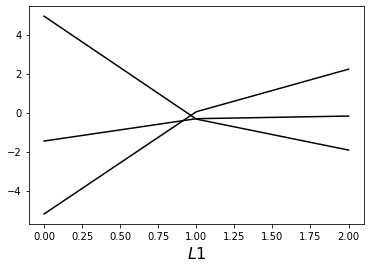

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

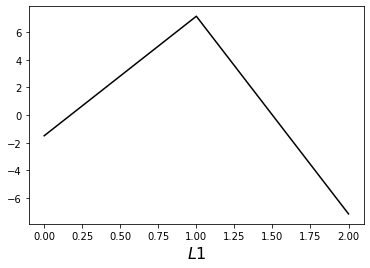

In [23]:
plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()
